## Main Idea
* write your inference as python scripts so that each time it should clear the cache and reset the state
* submit sample submission to pass through initial commit
* run all inference codes for whole test set

In [1]:
! pip uninstall -y typing
! pip install ../input/pytorchtabnetpretraining/pytorch_tabnet-2.0.1-py3-none-any.whl
! pip install /kaggle/input/iterative-stratification/iterative-stratification-master/

Found existing installation: typing 3.7.4.3
Uninstalling typing-3.7.4.3:
  Successfully uninstalled typing-3.7.4.3
Processing /kaggle/input/pytorchtabnetpretraining/pytorch_tabnet-2.0.1-py3-none-any.whl
Processing /kaggle/input/iterative-stratification/iterative-stratification-master
  Created wheel for iterative-stratification: filename=iterative_stratification-0.1.6-py3-none-any.whl size=8401 sha256=50a9b13fcb7e5b79e920d93341b736bff87192ef757f7fdd8d3cceff9096bfb3
  Stored in directory: /root/.cache/pip/wheels/b8/47/3f/eb4af42d124f37d23d6f13a4c8bbc32c1d70140e6e1cecb4aa
Successfully built iterative-stratification


In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import pickle
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pytorch_tabnet.metrics import Metric
from pytorch_tabnet.tab_model import TabNetRegressor

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../input/iterative-stratification/iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [3]:
SEED = [0, 1, 2, 3, 4]
NFOLDS = 5

for seed in SEED:
    for fold in range(NFOLDS):
        !cp -r ../input/yuki-moa-tabnet1/TabNet_FOLD{str(fold+1)}_SEED{str(seed)}/* .
        !zip TabNet_FOLD{fold+1}_SEED{seed}.zip model_params.json network.pt

  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 9%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 9%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 8%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 9%)
  adding: model_params.json (deflated 45%)
  adding: network.pt (deflated 9%)
  adding: model_params.json (deflated 45%)
  adding: network.pt 

In [4]:
# test = pd.read_csv('../input/lish-moa/test_features.csv')
# if len(test) == 3982:
#     submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
#     submission.to_csv('submission.csv', index=False)
# else:
# ! python ../input/baseline-inference/baseline_inference.py
# ! python ../input/baseline-inference/moa_v1_nn_inference.py
# ! python ../input/baseline-inference/moa_v2_nn_inference.py
# ! python ../input/baseline-inference/moa_v3_nn_inference.py
# ! python ../input/baseline-inference/moa_v4_nn_inference.py
# submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
# submission.iloc[:, 1:] = 0
# for sub in glob.glob('./*.csv'):
#     submission.iloc[:, 1:] += pd.read_csv(sub).iloc[:, 1:] * (1/len(glob.glob('./*.csv')))
# submission.to_csv('submission.csv', index=False)

In [5]:
! python ../input/yuki-moa-inference1/yuki-moa-simple-inference.py
! python ../input/yuki-moa-inference1/yuki-moa-resnet-inference.py
! python ../input/yuki-moa-inference1/yuki-moa-simple-deep-inference.py
! python ../input/yuki-moa-inference1/yuki-moa-tabnet-inference.py

rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1044)
test_features.shape (3982, 1044)
train.shape: (21948, 1249)
folds.shape: (21948, 1254)
test.shape: (3624, 1043)
target.shape: (21948, 207)
sample_submission.shape: (3982, 207)
device used: cuda
 
SEED : 0

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 1

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 2

==========FOLD1==========
==========FOLD2==========
==========FOLD3==========
==========FOLD4==========
==========FOLD5==========
 
SEED : 3

==========FOLD1==========
==========FOLD2==========
==========FOLD3==

In [6]:
submission = pd.read_csv('../input/lish-moa/sample_submission.csv')
submission.iloc[:, 1:] = 0

# Weights = [0.29827331, 0.,         0.27804099, 0.4236857 ]

submission_Simple1 = pd.read_csv('./submission_Simple.csv').iloc[:, 1:]
submission_ResNet1 = pd.read_csv('./submission_ResNet.csv').iloc[:, 1:]
submission_Simple_Deep1 = pd.read_csv('./submission_Simple_Deep.csv').iloc[:, 1:]
submission_TabNet1 = pd.read_csv('./submission_TabNet.csv').iloc[:, 1:]

# submission.iloc[:, 1:] = submission_Simple + submission_ResNet + submission_Simple_Deep + submission_TabNet

# submission.to_csv('submission.csv', index=False)

In [7]:
train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')

test_features = pd.read_csv('../input/lish-moa/test_features.csv')
sample_submission = pd.read_csv('../input/lish-moa/sample_submission.csv')

In [8]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASSED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)

## preprocess data

In [9]:
def rank_gauss(train_features, test_features):
    
    train_features_ = train_features.copy()
    test_features_ = test_features.copy()
    
    data = pd.concat([train_features_, test_features])
    
    GENES = [col for col in train_features_.columns if col.startswith('g-')]
    CELLS = [col for col in train_features_.columns if col.startswith('c-')]
    
    for col in (GENES + CELLS):

        transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
        vec_len = len(data[col].values)
#         vec_len_test = len(test_features_[col].values)
        raw_vec = data[col].values.reshape(vec_len, 1)
        raw_vec = transformer.fit_transform(raw_vec)

        train_features_[col] = raw_vec[:len(train_features)]
        test_features_[col] = raw_vec[len(train_features):]
        
    return train_features_, test_features_

# train_features1, test_features1 = rank_gauss2(train_features, test_features)
# train_features1

In [10]:
def get_stats(train_features, test_features):
    
    GENES = [col for col in train_features.columns if col.startswith('g-')]
    CELLS = [col for col in train_features.columns if col.startswith('c-')]
    
    for df in [train_features, test_features]:
#         df['g_sum'] = df[GENES].sum(axis = 1)
        df['g_mean'] = df[GENES].mean(axis = 1)
        df['g_std'] = df[GENES].std(axis = 1)
        df['g_kurt'] = df[GENES].kurtosis(axis = 1)
        df['g_skew'] = df[GENES].skew(axis = 1)
#         df['g_max'] = df[GENES].max(axis=1)
#         df['g_min'] = df[GENES].max(axis=1)
#         df['c_sum'] = df[CELLS].sum(axis=1)
        df['c_mean'] = df[CELLS].mean(axis = 1)
        df['c_std'] = df[CELLS].std(axis = 1)
        df['c_kurt'] = df[CELLS].kurtosis(axis = 1)
        df['c_skew'] = df[CELLS].skew(axis = 1)
#         df['c_max'] = df[CELLS].max(axis=1)
#         df['c_min'] = df[CELLS].min(axis=1)
#         df['gc_sum'] = df[GENES + CELLS].sum(axis = 1)
        df['gc_mean'] = df[GENES + CELLS].mean(axis = 1)
        df['gc_std'] = df[GENES + CELLS].std(axis = 1)
        df['gc_kurt'] = df[GENES + CELLS].kurtosis(axis = 1)
        df['gc_skew'] = df[GENES + CELLS].skew(axis = 1)
        
    return train_features, test_features

In [11]:
def get_pca(train_features, test_features, n_gs, n_cs):
    
    GENES = [col for col in train_features.columns if col.startswith('g-')]
    CELLS = [col for col in train_features.columns if col.startswith('c-')]
    
    pca_gs = PCA(n_components = n_gs)
    pca_cs = PCA(n_components = n_cs)
    
    data = pd.concat([train_features, test_features])
    
    data_pca_gs = pca_gs.fit_transform(data[GENES])
    data_pca_cs = pca_cs.fit_transform(data[CELLS])
    
    train_pca_gs = data_pca_gs[:len(train_features), :]
    train_pca_cs = data_pca_cs[:len(train_features), :]
    test_pca_gs = data_pca_gs[len(train_features):, :]
    test_pca_cs = data_pca_cs[len(train_features):, :]
    
    train_pca_gs = pd.DataFrame(train_pca_gs, columns=[f'pca_G-{i}' for i in range(n_gs)])
    train_pca_cs = pd.DataFrame(train_pca_cs, columns=[f'pca_C-{i}' for i in range(n_cs)])
    test_pca_gs = pd.DataFrame(test_pca_gs, columns=[f'pca_G-{i}' for i in range(n_gs)])
    test_pca_cs = pd.DataFrame(test_pca_cs, columns=[f'pca_C-{i}' for i in range(n_cs)])
    
    train_features = pd.concat([train_features, train_pca_gs, train_pca_cs], axis=1)
    test_features = pd.concat([test_features, test_pca_gs, test_pca_cs], axis=1)
    
    return train_features, test_features

# train_features2, test_features2 = get_pca2(train_features, test_features, n_gs=50, n_cs=15)
# test_features2

In [12]:
def var_thresh(threshold, train_features, test_features):

    cols_numeric = [f for f in train_features.columns if f not in ['sig_id', 'cp_type', 'cp_time', 'cp_dose']]
    mask = (train_features[cols_numeric].var() >= 0.8).values
    train_features_ = train_features[cols_numeric].loc[:, mask]
    test_features_ = test_features[cols_numeric].loc[:, mask]
    train_features = pd.concat([train_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']], train_features_], axis=1).reset_index(drop=True)
    test_features = pd.concat([test_features[['sig_id', 'cp_type', 'cp_time', 'cp_dose']], test_features_], axis=1).reset_index(drop=True)

    return train_features, test_features

In [13]:
def make_folds(train, num_starts, num_splits):
    
    train_ = train.copy()
    folds = []

    # LOAD FILES
    train_feats = pd.read_csv('../input/lish-moa/train_features.csv')
    scored = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')
    drug = pd.read_csv('/kaggle/input/lish-moa/train_drug.csv')
    scored = scored.loc[train_feats['cp_type'] == 'trt_cp', :]
    drug = drug.loc[train_feats['cp_type'] == 'trt_cp', :]
    targets = scored.columns[1:]
    scored = scored.merge(drug, on='sig_id', how='left') 

    # LOCATE DRUGS
    vc = scored.drug_id.value_counts()
    vc1 = vc.loc[(vc <= 6) | (vc == 12) | (vc == 18)].index.sort_values()
    vc2 = vc.loc[(vc > 6) & (vc != 12) & (vc != 18)].index.sort_values()

    for seed in range(num_starts):

        # STRATIFY DRUGS 18X OR LESS
        dct1 = {}; dct2 = {}
        skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed)
        tmp = scored.groupby('drug_id')[targets].mean().loc[vc1]
        for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
            dd = {k:fold for k in tmp.index[idxV].values}
            dct1.update(dd)

        # STRATIFY DRUGS MORE THAN 18X
        skf = MultilabelStratifiedKFold(n_splits = num_splits, shuffle = True, random_state = seed)
        tmp = scored.loc[scored.drug_id.isin(vc2)].reset_index(drop = True)
        for fold,(idxT,idxV) in enumerate(skf.split(tmp,tmp[targets])):
            dd = {k:fold for k in tmp.sig_id[idxV].values}
            dct2.update(dd)

        # ASSIGN FOLDS
        scored['fold'] = scored.drug_id.map(dct1)
        scored.loc[scored.fold.isna(),'fold'] =\
            scored.loc[scored.fold.isna(),'sig_id'].map(dct2)
        scored.fold = scored.fold.astype('int8')
        folds.append(scored.fold.values)

        del scored['fold']
        
        for i in range(len(folds)):
            train_[f'seed{i}'] = folds[i]

    return train_

In [14]:
def preprocessor(train_features, test_features, train_targets_scored, train_targets_nonscored):
    
#     # drop_ctl_vehicle
#     train_features, test_features, target = drop_ctl_vehicle(train_features, test_features)
#     print('drop_ctl_vehicle: done')
    
    # rank_gauss
    train_features, test_features = rank_gauss(train_features, test_features)
    print('rank_gauss: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # stats
    train_features, test_features = get_stats(train_features, test_features)
    print('get_stats: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # pca
    train_features, test_features = get_pca(train_features, test_features, n_gs=600, n_cs=50) 
    print('get_pca: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # var_thresh
    train_features, test_features = var_thresh(threshold=0.8, train_features=train_features, test_features=test_features)
    print('var_thresh: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
#     # clustering
#     train_features, test_features = get_cluster(train_features, test_features, n_clusters_g=35, n_clusters_c=5, SEED=0)
#     print('get_clustering: done')
#     print('train_features.shape', train_features.shape)
#     print('test_features.shape', test_features.shape)
    
#     # Scaling
#     train_features, test_features = scaling(train_features, test_features)
#     print('scaling: done')  # ない方がいいかも。
    
    # data merge
    nonscored_cols = train_targets_nonscored.iloc[:, 1:].sum(axis=0).sort_values(ascending=False).index.tolist() # Moaが多い順にカラムを取得
    nonscored_cols = ['sig_id'] + nonscored_cols[:train_targets_scored.shape[1]-1]
    train_targets_nonscored = train_targets_nonscored[nonscored_cols] # MoAが多い順にnonscoredからscoredと同じ分だけ抜き取る
    
    train = train_features.merge(train_targets_scored, on='sig_id').merge(train_targets_nonscored, on='sig_id')
    train = train[train['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
    test = test_features[test_features['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)

    target = train[train_targets_scored.columns]
    target_nonscored = train[train_targets_nonscored.columns]
    target_nonscored = target_nonscored.iloc[:, :target.shape[1]]
    
    train = train.drop('cp_type', axis=1)
    test = test.drop('cp_type', axis=1)
    
    return train, target, test, target_nonscored

train, target, test, target_nonscored = preprocessor(train_features, test_features, train_targets_scored, train_targets_nonscored)

rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1043)
test_features.shape (3982, 1043)


In [15]:
folds = make_folds(train, num_starts=3, num_splits=5)

In [16]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]
predictors = GENES+CELLS

target_cols = target.drop('sig_id', axis=1).columns.values.tolist()
target_nonscored_cols = target_nonscored.drop('sig_id', axis=1).columns.values.tolist()
feature_cols = [c for c in pd.get_dummies(train, columns=['cp_time', 'cp_dose']).columns if (c not in target_cols) & (c not in target_nonscored_cols)]
feature_cols = [c for c in feature_cols if c not in ['kfold', 'sig_id']]
len(feature_cols)

1044

### shape check

In [17]:
print(f'train.shape: {train.shape}')
print(f'folds.shape: {folds.shape}')
print(f'test.shape: {test.shape}')
print(f'target.shape: {target.shape}')
print(f'target_nonscored.shape: {target_nonscored.shape}')
print(f'sample_submission.shape: {sample_submission.shape}')

train.shape: (21948, 1454)
folds.shape: (21948, 1457)
test.shape: (3624, 1042)
target.shape: (21948, 207)
target_nonscored.shape: (21948, 207)
sample_submission.shape: (3982, 207)


## Dataset Classes

In [18]:
class MoADataset:
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float), 
            'y' : torch.tensor(self.targets[idx, :], dtype=torch.float)
        }
        return dct
    
class TestDataset:
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float)
        }
        return dct

### training function

In [19]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1:
            outputs = model(inputs)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

            final_loss += loss.item()
            final_metric += metric.item()
        
        else:
            rejected += len(inputs)
            
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [20]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [21]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        
        with torch.no_grad():
            outputs = model(inputs)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

### loss_function

In [22]:
class LogitsLogLoss(Metric):
    """
    LogLoss with sigmoid applied
    """

    def __init__(self):
        self._name = "logits_ll"
        self._maximize = False

    def __call__(self, y_true, y_pred):
        """
        Compute LogLoss of predictions.

        Parameters
        ----------
        y_true: np.ndarray
            Target matrix or vector
        y_score: np.ndarray
            Score matrix or vector

        Returns
        -------
            float
            LogLoss of predictions vs targets.
        """
        
        logits = 1 / (1 + np.exp(-y_pred))
#         logits = np.clip(logits, p_min, p_max)
        aux = (1 - y_true) * np.log(1 - logits + 1e-15) + y_true * np.log(logits + 1e-15)
        return np.mean(-aux)

In [23]:
import torch
from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F

class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1

        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
            
        return targets
    
    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

In [24]:
class Model_Simple(nn.Module):
    def __init__(self, num_features, num_targets, hidden_size_1, hidden_size_2):
        super(Model_Simple, self).__init__()
        
        self.batch_norm1 = nn.BatchNorm1d(num_features=num_features)
        self.dropout1 = nn.Dropout(0.1)
        self.Linear1 = nn.utils.weight_norm(nn.Linear(num_features, hidden_size_1))
        self.leaky_relu1 = nn.LeakyReLU()
        
        self.batch_norm2 = nn.BatchNorm1d(hidden_size_1)
        self.dropout2 = nn.Dropout(0.4)
        self.Linear2 = nn.utils.weight_norm(nn.Linear(hidden_size_1, hidden_size_2))
        self.leaky_relu2 = nn.LeakyReLU()
        
        
        self.batch_norm3 = nn.BatchNorm1d(hidden_size_2)
        self.dropout3 = nn.Dropout(0.4)
        self.Linear3 = nn.utils.weight_norm(nn.Linear(hidden_size_2, num_targets))
        
    def recalibrate_layer(self, layer):

        if(torch.isnan(layer.weight_v).sum() > 0):
            print ('recalibrate layer.weight_v')
            layer.weight_v = torch.nn.Parameter(torch.where(torch.isnan(layer.weight_v), torch.zeros_like(layer.weight_v), layer.weight_v))
            layer.weight_v = torch.nn.Parameter(layer.weight_v + 1e-7)

        if(torch.isnan(layer.weight).sum() > 0):
            print ('recalibrate layer.weight')
            layer.weight = torch.where(torch.isnan(layer.weight), torch.zeros_like(layer.weight), layer.weight)
            layer.weight += 1e-7
        
        
    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        self.recalibrate_layer(self.Linear1)
        x = self.Linear1(x)
        x = self.leaky_relu1(x)
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        self.recalibrate_layer(layer=self.Linear2)
        x = self.Linear2(x)
        x = self.leaky_relu2(x)
        
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        self.recalibrate_layer(layer=self.Linear3)
        x = self.Linear3(x)
        
        return x

In [25]:
class Model_ResNet(nn.Module):
    def __init__(self, num_features_1, num_features_2, num_targets, hidden_1, hidden_2):
        super(Model_ResNet, self).__init__()
        
        self.batchnorm1_1 = nn.BatchNorm1d(num_features_1)
        self.dropout1_1 = nn.Dropout(0.3)
        self.Linear1_1 = nn.Linear(num_features_1, hidden_1)
        self.relu1_1 = nn.ReLU()
        self.batchnorm1_2 = nn.BatchNorm1d(hidden_1)
        self.Linear1_2 = nn.Linear(hidden_1, hidden_2)
        self.relu1_2 = nn.ReLU()
        
        self.batchnorm2_1 = nn.BatchNorm1d(num_features_2+hidden_2)
        self.dropout2_1 = nn.Dropout(0.3)
        self.Linear2_1 = nn.Linear(num_features_2+hidden_2, hidden_1)
        self.relu2_1 = nn.ReLU()
        self.batchnorm2_2 = nn.BatchNorm1d(hidden_1)
        self.Linear2_2 = nn.Linear(hidden_1, hidden_1)
        self.relu2_2 = nn.ReLU()
        self.batchnorm2_3 = nn.BatchNorm1d(hidden_1)
        self.Linear2_3 = nn.Linear(hidden_1, hidden_2)
        self.relu2_3 = nn.ReLU()
        
        self.batchnorm3_1 = nn.BatchNorm1d(hidden_2)
        self.Linear3_1 = nn.Linear(hidden_2, hidden_2)
        self.relu3_1 = nn.ReLU()
        self.batchnorm3_2 = nn.BatchNorm1d(hidden_2) 
        self.Linear3_2 = nn.Linear(hidden_2, num_targets)
        
        
        
    def recalibrate_layer(self, layer):

        if(torch.isnan(layer.weight_v).sum() > 0):
            print ('recalibrate layer.weight_v')
            layer.weight_v = torch.nn.Parameter(torch.where(torch.isnan(layer.weight_v), torch.zeros_like(layer.weight_v), layer.weight_v))
            layer.weight_v = torch.nn.Parameter(layer.weight_v + 1e-7)

        if(torch.isnan(layer.weight).sum() > 0):
            print ('recalibrate layer.weight')
            layer.weight = torch.where(torch.isnan(layer.weight), torch.zeros_like(layer.weight), layer.weight)
            layer.weight += 1e-7
            
    def forward(self, x_1, x_2):
        
        input_1 = x_1
        input_2 = x_2
        
        input_3 = self.batchnorm1_1(input_1)
        input_3 = self.dropout1_1(input_3)
        input_3 = self.Linear1_1(input_3)
        input_3 = self.relu1_1(input_3)
        input_3 = self.batchnorm1_2(input_3)
        input_3 = self.Linear1_2(input_3)
        input_3 = self.relu1_2(input_3)
        
        input_3_concat = torch.cat([input_2, input_3], axis=1)
        
        input_4 = self.batchnorm2_1(input_3_concat)
        input_4 = self.dropout2_1(input_4)
        input_4 = self.Linear2_1(input_4)
        input_4 = self.relu2_1(input_4)
        input_4 = self.batchnorm2_2(input_4)
        input_4 = self.Linear2_2(input_4)
        input_4 = self.relu2_2(input_4)
        input_4 = self.batchnorm2_3(input_4)
        input_4 = self.Linear2_3(input_4)
        input_4 = self.relu2_3(input_4)
        
        input_4_avg = (input_3 + input_4) * 0.5
        
        output = self.batchnorm3_1(input_4_avg)
        output = self.Linear3_1(output)
        output = self.relu3_1(output)
        output = self.batchnorm3_2(output)
        output = self.Linear3_2(output)
        
        return output

In [26]:
class Model_Simple_Deep(nn.Module):
    
    def __init__(self, num_features, num_targets):
        
        super(Model_Simple_Deep, self).__init__()
        self.hidden_size = [1500, 1250, 1000, 750]
        self.dropout_value = [0.5, 0.35, 0.3, 0.25]

        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dense1 = nn.Linear(num_features, self.hidden_size[0])
        
        self.batch_norm2 = nn.BatchNorm1d(self.hidden_size[0])
        self.dropout2 = nn.Dropout(self.dropout_value[0])
        self.dense2 = nn.Linear(self.hidden_size[0], self.hidden_size[1])

        self.batch_norm3 = nn.BatchNorm1d(self.hidden_size[1])
        self.dropout3 = nn.Dropout(self.dropout_value[1])
        self.dense3 = nn.Linear(self.hidden_size[1], self.hidden_size[2])

        self.batch_norm4 = nn.BatchNorm1d(self.hidden_size[2])
        self.dropout4 = nn.Dropout(self.dropout_value[2])
        self.dense4 = nn.Linear(self.hidden_size[2], self.hidden_size[3])

        self.batch_norm5 = nn.BatchNorm1d(self.hidden_size[3])
        self.dropout5 = nn.Dropout(self.dropout_value[3])
        self.dense5 = nn.utils.weight_norm(nn.Linear(self.hidden_size[3], num_targets))
    
    def forward(self, x):
        
        x = self.batch_norm1(x)
        x = F.leaky_relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.leaky_relu(self.dense2(x))

        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = F.leaky_relu(self.dense3(x))

        x = self.batch_norm4(x)
        x = self.dropout4(x)
        x = F.leaky_relu(self.dense4(x))

        x = self.batch_norm5(x)
        x = self.dropout5(x)
        x = self.dense5(x)
        return x
    
class LabelSmoothingLoss(nn.Module):
    
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)

        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
            
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))    

In [27]:
class FineTuneScheduler:
    def __init__(self, epochs):
        self.epochs = epochs
        self.epochs_per_step = 0
        self.frozen_layers = []
        
    def copy_without_top(self, model, num_features, num_targets, num_targets_new):
        self.frozen_layers = []
        
        model_new = Model_Simple_Deep(num_features, num_targets)
        model_new.load_state_dict(model.state_dict())
        
        # Freeze all weights
        for name, param in model_new.named_parameters():
            layer_index = name.split('.')[0][-1]
            
            if layer_index == 5:
                continue
                
            param.requires_grad = False
            
            # Save frozen layer names
            if layer_index not in self.frozen_layers:
                self.frozen_layers.append(layer_index)
                
        self.epochs_per_step = self.epochs // len(self.frozen_layers)
        
        # Replace the top layers with another ones
        model_new.batch_norm5 = nn.BatchNorm1d(model_new.hidden_size[3])
        model_new.dropout5 = nn.Dropout(model_new.dropout_value[3])
        model_new.dense5 = nn.utils.weight_norm(nn.Linear(model_new.hidden_size[-1], num_targets_new))
        model_new.to(DEVICE)
        return model_new
    
    def step(self, epoch, model):
        if len(self.frozen_layers) == 0:
            return 
        
        if epoch % self.epochs_per_step == 0:
            last_frozen_index = self.frozen_layers[-1]
            
            # Unfreeze parameters of the last frozen layer
            for name, param in model.named_parameters():
                layer_index = name.split('.')[0][-1]
                
                if layer_index == last_frozen_index:
                    param.requires_grad = True
                    
            del self.frozen_layers[-1]  # Remove the last layer as unfrozen

## Model Simple

In [28]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 5e-6
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

num_features = len(feature_cols)
num_targets = len(target_cols)
hidden_size_1 = 1024
hidden_size_2 = 1024

In [29]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    CV = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train[f'seed{seed}'] != fold].index
    val_idx = train[train[f'seed{seed}'] == fold].index
    
    train_df = train[train[f'seed{seed}'] != fold].reset_index()
    valid_df = train[train[f'seed{seed}'] == fold].reset_index()
    
    x_train, y_train = train_df[feature_cols].values, train_df[target_cols].values
    x_valid, y_valid = valid_df[feature_cols].values, valid_df[target_cols].values
    
    train_dataset = MoADataset(x_train, y_train)
    valid_dataset = MoADataset(x_valid, y_valid)
    
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_Simple(num_features=num_features,
                      num_targets=num_targets, 
                      hidden_size_1=hidden_size_1, 
                      hidden_size_2=hidden_size_2)
    

    model.to(DEVICE)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader)) 
    
    loss_fn = nn.BCEWithLogitsLoss()
    loss_tr = SmoothBCEwLogits(smoothing=smoothing)
    
    early_stoppping_steps = EARLY_STOPPING_STEPS
    early_step = 0
    
    oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses.append(valid_metric)
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'Simple_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= early_stopping_steps):
                break
                
    y_true = train_targets_scored[target_cols].values
                
    cv = 0
    for i in range(len(target_cols)):
        cv_ = log_loss(y_true[val_idx, i], oof[val_idx, i], labels=[0, 1])
        cv += cv_ / len(target_cols)
                
    plt.plot(train_losses, label='train_losses')
    plt.plot(valid_losses, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-2, 2e-2])
    plt.title(f'fold{fold+1} losses')
    plt.show()
                
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_Simple(num_features=num_features, 
                             num_targets=num_targets, 
                             hidden_size_1=hidden_size_1,
                             hidden_size_2=hidden_size_2)
    
    model.load_state_dict(torch.load(f'Simple_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions, cv

In [30]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    CVs = list()
    
    for fold in range(NFOLDS):
        oof_, pred_, cv_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        CVs.append(cv_)
        
    return oof, predictions, CVs

device used: cuda
 
SEED : 0

==========FOLD1==========
-----EPOCH1-----
train_loss: 0.73738, train_metric: 0.73737
valid_loss: 0.64322, valid_metric: 0.64315
-----EPOCH2-----
train_loss: 0.27043, train_metric: 0.26949
valid_loss: 0.03686, valid_metric: 0.03486
-----EPOCH3-----
train_loss: 0.02815, train_metric: 0.02570
valid_loss: 0.02346, valid_metric: 0.02070
-----EPOCH4-----
train_loss: 0.02324, train_metric: 0.02030
valid_loss: 0.02216, valid_metric: 0.01908
-----EPOCH5-----
train_loss: 0.02209, train_metric: 0.01896
valid_loss: 0.02206, valid_metric: 0.01873
-----EPOCH6-----
train_loss: 0.02172, train_metric: 0.01850
valid_loss: 0.02151, valid_metric: 0.01829
-----EPOCH7-----
train_loss: 0.02089, train_metric: 0.01765
valid_loss: 0.02098, valid_metric: 0.01777
-----EPOCH8-----
train_loss: 0.02036, train_metric: 0.01713
valid_loss: 0.02057, valid_metric: 0.01740
-----EPOCH9-----
train_loss: 0.02019, train_metric: 0.01697
valid_loss: 0.02042, valid_metric: 0.01720
-----EPOCH10-----

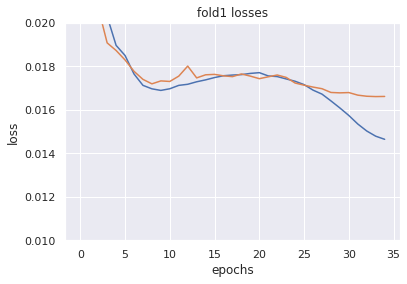

==========FOLD2==========
-----EPOCH1-----
train_loss: 0.73741, train_metric: 0.73740
valid_loss: 0.64693, valid_metric: 0.64687
-----EPOCH2-----
train_loss: 0.27023, train_metric: 0.26930
valid_loss: 0.03419, valid_metric: 0.03221
-----EPOCH3-----
train_loss: 0.02783, train_metric: 0.02538
valid_loss: 0.02344, valid_metric: 0.02070
-----EPOCH4-----
train_loss: 0.02302, train_metric: 0.02010
valid_loss: 0.02216, valid_metric: 0.01914
-----EPOCH5-----
train_loss: 0.02231, train_metric: 0.01917
valid_loss: 0.02212, valid_metric: 0.01885
-----EPOCH6-----
train_loss: 0.02140, train_metric: 0.01818
valid_loss: 0.02170, valid_metric: 0.01846
-----EPOCH7-----
train_loss: 0.02062, train_metric: 0.01737
valid_loss: 0.02161, valid_metric: 0.01839
-----EPOCH8-----
train_loss: 0.02020, train_metric: 0.01696
valid_loss: 0.02124, valid_metric: 0.01801
-----EPOCH9-----
train_loss: 0.01990, train_metric: 0.01667
valid_loss: 0.02144, valid_metric: 0.01824
-----EPOCH10-----
train_loss: 0.01990, train_me

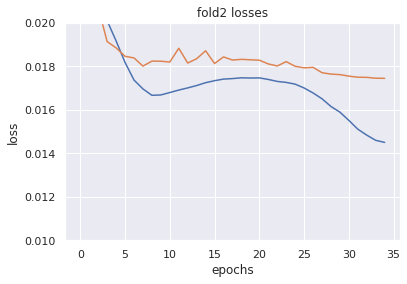

==========FOLD3==========
-----EPOCH1-----
train_loss: 0.73776, train_metric: 0.73775
valid_loss: 0.64651, valid_metric: 0.64645
-----EPOCH2-----
train_loss: 0.27172, train_metric: 0.27079
valid_loss: 0.03468, valid_metric: 0.03266
-----EPOCH3-----
train_loss: 0.02821, train_metric: 0.02575
valid_loss: 0.02324, valid_metric: 0.02052
-----EPOCH4-----
train_loss: 0.02376, train_metric: 0.02081
valid_loss: 0.02282, valid_metric: 0.01982
-----EPOCH5-----
train_loss: 0.02261, train_metric: 0.01945
valid_loss: 0.02173, valid_metric: 0.01856
-----EPOCH6-----
train_loss: 0.02155, train_metric: 0.01834
valid_loss: 0.02134, valid_metric: 0.01803
-----EPOCH7-----
train_loss: 0.02097, train_metric: 0.01773
valid_loss: 0.02159, valid_metric: 0.01843
-----EPOCH8-----
train_loss: 0.02042, train_metric: 0.01719
valid_loss: 0.02100, valid_metric: 0.01779
-----EPOCH9-----
train_loss: 0.02003, train_metric: 0.01681
valid_loss: 0.02070, valid_metric: 0.01753
-----EPOCH10-----
train_loss: 0.02002, train_me

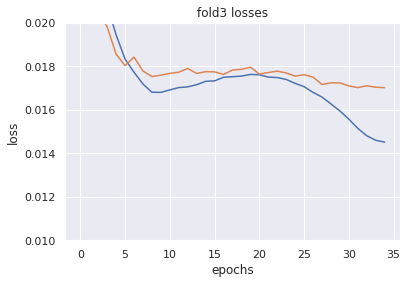

==========FOLD4==========
-----EPOCH1-----
train_loss: 0.73736, train_metric: 0.73735
valid_loss: 0.64265, valid_metric: 0.64258
-----EPOCH2-----
train_loss: 0.26914, train_metric: 0.26820
valid_loss: 0.03488, valid_metric: 0.03291
-----EPOCH3-----
train_loss: 0.02808, train_metric: 0.02563
valid_loss: 0.02366, valid_metric: 0.02096
-----EPOCH4-----
train_loss: 0.02350, train_metric: 0.02055
valid_loss: 0.02213, valid_metric: 0.01907
-----EPOCH5-----
train_loss: 0.02203, train_metric: 0.01891
valid_loss: 0.02166, valid_metric: 0.01858
-----EPOCH6-----
train_loss: 0.02182, train_metric: 0.01861
valid_loss: 0.02146, valid_metric: 0.01821
-----EPOCH7-----
train_loss: 0.02093, train_metric: 0.01770
valid_loss: 0.02118, valid_metric: 0.01800
-----EPOCH8-----
train_loss: 0.02040, train_metric: 0.01718
valid_loss: 0.02096, valid_metric: 0.01776
-----EPOCH9-----
train_loss: 0.02008, train_metric: 0.01686
valid_loss: 0.02080, valid_metric: 0.01760
-----EPOCH10-----
train_loss: 0.02012, train_me

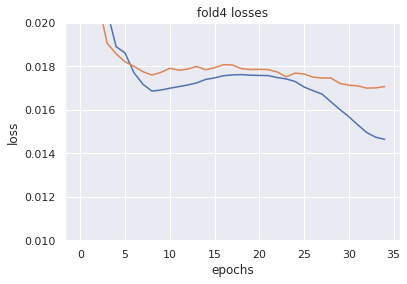

==========FOLD5==========
-----EPOCH1-----
train_loss: 0.73733, train_metric: 0.73732
valid_loss: 0.64516, valid_metric: 0.64510
-----EPOCH2-----
train_loss: 0.27119, train_metric: 0.27026
valid_loss: 0.03511, valid_metric: 0.03312
-----EPOCH3-----
train_loss: 0.02827, train_metric: 0.02581
valid_loss: 0.02335, valid_metric: 0.02063
-----EPOCH4-----
train_loss: 0.02334, train_metric: 0.02040
valid_loss: 0.02203, valid_metric: 0.01898
-----EPOCH5-----
train_loss: 0.02245, train_metric: 0.01932
valid_loss: 0.02165, valid_metric: 0.01851
-----EPOCH6-----
train_loss: 0.02156, train_metric: 0.01835
valid_loss: 0.02171, valid_metric: 0.01842
-----EPOCH7-----
train_loss: 0.02114, train_metric: 0.01790
valid_loss: 0.02120, valid_metric: 0.01803
-----EPOCH8-----
train_loss: 0.02038, train_metric: 0.01715
valid_loss: 0.02105, valid_metric: 0.01783
-----EPOCH9-----
train_loss: 0.02005, train_metric: 0.01682
valid_loss: 0.02090, valid_metric: 0.01773
-----EPOCH10-----
train_loss: 0.02001, train_me

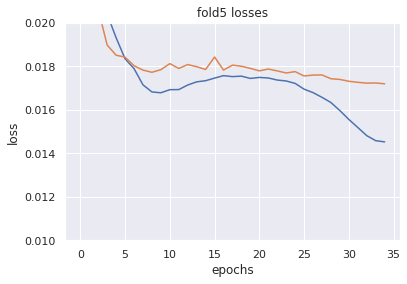

 
SEED : 1

==========FOLD1==========
-----EPOCH1-----
train_loss: 0.73754, train_metric: 0.73753
valid_loss: 0.64476, valid_metric: 0.64470
-----EPOCH2-----
train_loss: 0.27073, train_metric: 0.26980
valid_loss: 0.03371, valid_metric: 0.03168
-----EPOCH3-----
train_loss: 0.02778, train_metric: 0.02533
valid_loss: 0.02287, valid_metric: 0.02008
-----EPOCH4-----
train_loss: 0.02303, train_metric: 0.02010
valid_loss: 0.02254, valid_metric: 0.01947
-----EPOCH5-----
train_loss: 0.02203, train_metric: 0.01890
valid_loss: 0.02159, valid_metric: 0.01838
-----EPOCH6-----
train_loss: 0.02136, train_metric: 0.01815
valid_loss: 0.02126, valid_metric: 0.01806
-----EPOCH7-----
train_loss: 0.02065, train_metric: 0.01740
valid_loss: 0.02127, valid_metric: 0.01806
-----EPOCH8-----
train_loss: 0.02029, train_metric: 0.01706
valid_loss: 0.02109, valid_metric: 0.01786
-----EPOCH9-----
train_loss: 0.01998, train_metric: 0.01675
valid_loss: 0.02097, valid_metric: 0.01778
-----EPOCH10-----
train_loss: 0.019

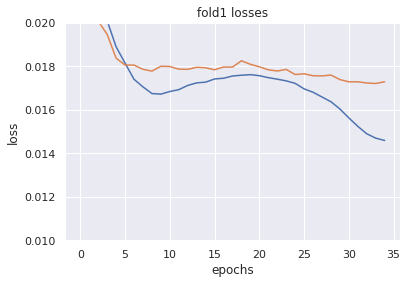

==========FOLD2==========
-----EPOCH1-----
train_loss: 0.73731, train_metric: 0.73730
valid_loss: 0.64157, valid_metric: 0.64151
-----EPOCH2-----
train_loss: 0.26980, train_metric: 0.26886
valid_loss: 0.03363, valid_metric: 0.03162
-----EPOCH3-----
train_loss: 0.02811, train_metric: 0.02566
valid_loss: 0.02341, valid_metric: 0.02060
-----EPOCH4-----
train_loss: 0.02311, train_metric: 0.02018
valid_loss: 0.02212, valid_metric: 0.01917
-----EPOCH5-----
train_loss: 0.02212, train_metric: 0.01900
valid_loss: 0.02206, valid_metric: 0.01895
-----EPOCH6-----
train_loss: 0.02145, train_metric: 0.01823
valid_loss: 0.02165, valid_metric: 0.01845
-----EPOCH7-----
train_loss: 0.02072, train_metric: 0.01748
valid_loss: 0.02131, valid_metric: 0.01807
-----EPOCH8-----
train_loss: 0.02022, train_metric: 0.01698
valid_loss: 0.02116, valid_metric: 0.01789
-----EPOCH9-----
train_loss: 0.01992, train_metric: 0.01669
valid_loss: 0.02113, valid_metric: 0.01802
-----EPOCH10-----
train_loss: 0.01994, train_me

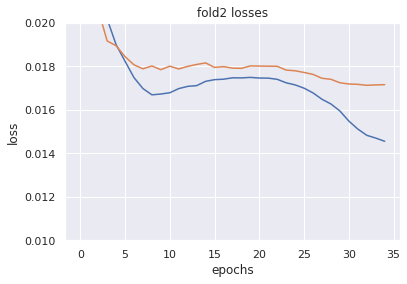

==========FOLD3==========
-----EPOCH1-----
train_loss: 0.73778, train_metric: 0.73777
valid_loss: 0.64091, valid_metric: 0.64084
-----EPOCH2-----
train_loss: 0.27111, train_metric: 0.27018
valid_loss: 0.03356, valid_metric: 0.03153
-----EPOCH3-----
train_loss: 0.02822, train_metric: 0.02577
valid_loss: 0.02379, valid_metric: 0.02104
-----EPOCH4-----
train_loss: 0.02323, train_metric: 0.02029
valid_loss: 0.02242, valid_metric: 0.01934
-----EPOCH5-----
train_loss: 0.02208, train_metric: 0.01895
valid_loss: 0.02206, valid_metric: 0.01882
-----EPOCH6-----
train_loss: 0.02152, train_metric: 0.01831
valid_loss: 0.02159, valid_metric: 0.01842
-----EPOCH7-----
train_loss: 0.02077, train_metric: 0.01753
valid_loss: 0.02141, valid_metric: 0.01817
-----EPOCH8-----
train_loss: 0.02031, train_metric: 0.01708
valid_loss: 0.02124, valid_metric: 0.01806
-----EPOCH9-----
train_loss: 0.01995, train_metric: 0.01672
valid_loss: 0.02131, valid_metric: 0.01808
-----EPOCH10-----
train_loss: 0.01997, train_me

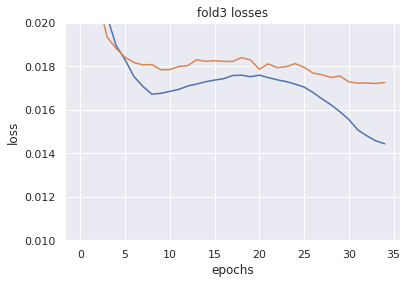

==========FOLD4==========
-----EPOCH1-----
train_loss: 0.73737, train_metric: 0.73736
valid_loss: 0.63946, valid_metric: 0.63940
-----EPOCH2-----
train_loss: 0.27021, train_metric: 0.26927
valid_loss: 0.03512, valid_metric: 0.03313
-----EPOCH3-----
train_loss: 0.02824, train_metric: 0.02579
valid_loss: 0.02339, valid_metric: 0.02066
-----EPOCH4-----
train_loss: 0.02330, train_metric: 0.02038
valid_loss: 0.02219, valid_metric: 0.01915
-----EPOCH5-----
train_loss: 0.02224, train_metric: 0.01912
valid_loss: 0.02141, valid_metric: 0.01823
-----EPOCH6-----
train_loss: 0.02153, train_metric: 0.01832
valid_loss: 0.02112, valid_metric: 0.01796
-----EPOCH7-----
train_loss: 0.02082, train_metric: 0.01758
valid_loss: 0.02099, valid_metric: 0.01777
-----EPOCH8-----
train_loss: 0.02035, train_metric: 0.01711
valid_loss: 0.02080, valid_metric: 0.01763
-----EPOCH9-----
train_loss: 0.02011, train_metric: 0.01689
valid_loss: 0.02087, valid_metric: 0.01765
-----EPOCH10-----
train_loss: 0.02010, train_me

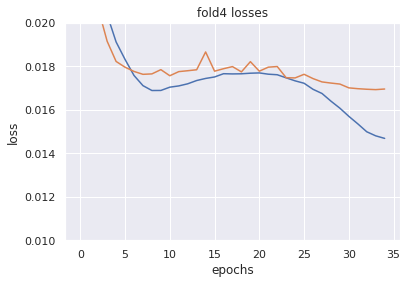

==========FOLD5==========
-----EPOCH1-----
train_loss: 0.73751, train_metric: 0.73750
valid_loss: 0.64585, valid_metric: 0.64579
-----EPOCH2-----
train_loss: 0.26931, train_metric: 0.26837
valid_loss: 0.03648, valid_metric: 0.03450
-----EPOCH3-----
train_loss: 0.02840, train_metric: 0.02595
valid_loss: 0.02328, valid_metric: 0.02054
-----EPOCH4-----
train_loss: 0.02334, train_metric: 0.02040
valid_loss: 0.02238, valid_metric: 0.01938
-----EPOCH5-----
train_loss: 0.02251, train_metric: 0.01936
valid_loss: 0.02119, valid_metric: 0.01803
-----EPOCH6-----
train_loss: 0.02159, train_metric: 0.01837
valid_loss: 0.02098, valid_metric: 0.01770
-----EPOCH7-----
train_loss: 0.02086, train_metric: 0.01762
valid_loss: 0.02081, valid_metric: 0.01763
-----EPOCH8-----
train_loss: 0.02044, train_metric: 0.01720
valid_loss: 0.02077, valid_metric: 0.01759
-----EPOCH9-----
train_loss: 0.02009, train_metric: 0.01686
valid_loss: 0.02063, valid_metric: 0.01740
-----EPOCH10-----
train_loss: 0.02011, train_me

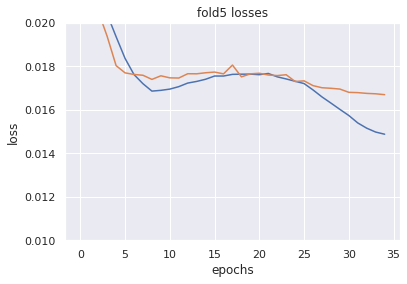

 
SEED : 2

==========FOLD1==========
-----EPOCH1-----
train_loss: 0.73838, train_metric: 0.73837
valid_loss: 0.64672, valid_metric: 0.64666
-----EPOCH2-----
train_loss: 0.27084, train_metric: 0.26990
valid_loss: 0.03508, valid_metric: 0.03308
-----EPOCH3-----
train_loss: 0.02817, train_metric: 0.02573
valid_loss: 0.02303, valid_metric: 0.02029
-----EPOCH4-----
train_loss: 0.02346, train_metric: 0.02053
valid_loss: 0.02183, valid_metric: 0.01877
-----EPOCH5-----
train_loss: 0.02246, train_metric: 0.01932
valid_loss: 0.02143, valid_metric: 0.01831
-----EPOCH6-----
train_loss: 0.02158, train_metric: 0.01837
valid_loss: 0.02108, valid_metric: 0.01787
-----EPOCH7-----
train_loss: 0.02087, train_metric: 0.01764
valid_loss: 0.02072, valid_metric: 0.01752
-----EPOCH8-----
train_loss: 0.02033, train_metric: 0.01710
valid_loss: 0.02075, valid_metric: 0.01757
-----EPOCH9-----
train_loss: 0.02009, train_metric: 0.01686
valid_loss: 0.02067, valid_metric: 0.01745
-----EPOCH10-----
train_loss: 0.020

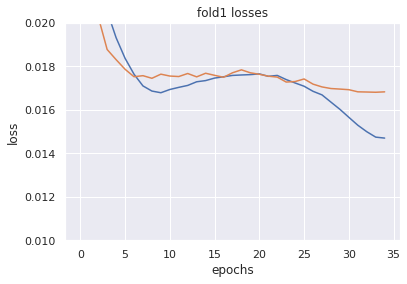

==========FOLD2==========
-----EPOCH1-----
train_loss: 0.73822, train_metric: 0.73821
valid_loss: 0.64952, valid_metric: 0.64947
-----EPOCH2-----
train_loss: 0.26890, train_metric: 0.26796
valid_loss: 0.03503, valid_metric: 0.03305
-----EPOCH3-----
train_loss: 0.02788, train_metric: 0.02544
valid_loss: 0.02321, valid_metric: 0.02047
-----EPOCH4-----
train_loss: 0.02296, train_metric: 0.02002
valid_loss: 0.02196, valid_metric: 0.01902
-----EPOCH5-----
train_loss: 0.02197, train_metric: 0.01885
valid_loss: 0.02171, valid_metric: 0.01853
-----EPOCH6-----
train_loss: 0.02140, train_metric: 0.01818
valid_loss: 0.02149, valid_metric: 0.01828
-----EPOCH7-----
train_loss: 0.02075, train_metric: 0.01751
valid_loss: 0.02139, valid_metric: 0.01816
-----EPOCH8-----
train_loss: 0.02018, train_metric: 0.01695
valid_loss: 0.02133, valid_metric: 0.01809
-----EPOCH9-----
train_loss: 0.01999, train_metric: 0.01676
valid_loss: 0.02125, valid_metric: 0.01801
-----EPOCH10-----
train_loss: 0.01999, train_me

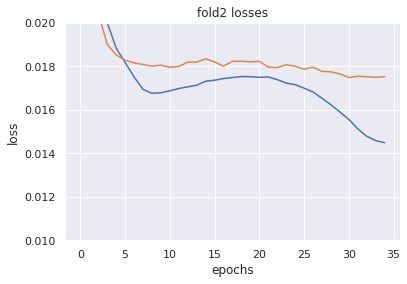

==========FOLD3==========
-----EPOCH1-----
train_loss: 0.73834, train_metric: 0.73833
valid_loss: 0.64951, valid_metric: 0.64945
-----EPOCH2-----
train_loss: 0.27052, train_metric: 0.26958
valid_loss: 0.03591, valid_metric: 0.03392
-----EPOCH3-----
train_loss: 0.02798, train_metric: 0.02553
valid_loss: 0.02384, valid_metric: 0.02107
-----EPOCH4-----
train_loss: 0.02328, train_metric: 0.02033
valid_loss: 0.02261, valid_metric: 0.01961
-----EPOCH5-----
train_loss: 0.02197, train_metric: 0.01884
valid_loss: 0.02189, valid_metric: 0.01871
-----EPOCH6-----
train_loss: 0.02139, train_metric: 0.01818
valid_loss: 0.02168, valid_metric: 0.01845
-----EPOCH7-----
train_loss: 0.02069, train_metric: 0.01745
valid_loss: 0.02178, valid_metric: 0.01856
-----EPOCH8-----
train_loss: 0.02025, train_metric: 0.01702
valid_loss: 0.02141, valid_metric: 0.01813
-----EPOCH9-----
train_loss: 0.01993, train_metric: 0.01670
valid_loss: 0.02115, valid_metric: 0.01789
-----EPOCH10-----
train_loss: 0.01985, train_me

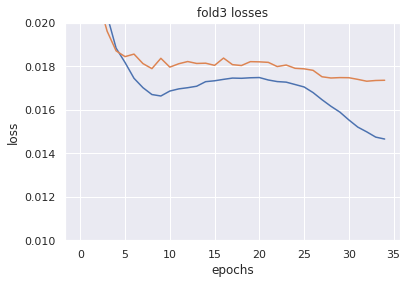

==========FOLD4==========
-----EPOCH1-----
train_loss: 0.73875, train_metric: 0.73874
valid_loss: 0.64838, valid_metric: 0.64833
-----EPOCH2-----
train_loss: 0.26939, train_metric: 0.26845
valid_loss: 0.03420, valid_metric: 0.03222
-----EPOCH3-----
train_loss: 0.02810, train_metric: 0.02565
valid_loss: 0.02307, valid_metric: 0.02031
-----EPOCH4-----
train_loss: 0.02336, train_metric: 0.02042
valid_loss: 0.02201, valid_metric: 0.01882
-----EPOCH5-----
train_loss: 0.02240, train_metric: 0.01927
valid_loss: 0.02112, valid_metric: 0.01799
-----EPOCH6-----
train_loss: 0.02151, train_metric: 0.01830
valid_loss: 0.02099, valid_metric: 0.01780
-----EPOCH7-----
train_loss: 0.02089, train_metric: 0.01765
valid_loss: 0.02102, valid_metric: 0.01776
-----EPOCH8-----
train_loss: 0.02035, train_metric: 0.01712
valid_loss: 0.02082, valid_metric: 0.01763
-----EPOCH9-----
train_loss: 0.02008, train_metric: 0.01686
valid_loss: 0.02077, valid_metric: 0.01753
-----EPOCH10-----
train_loss: 0.02001, train_me

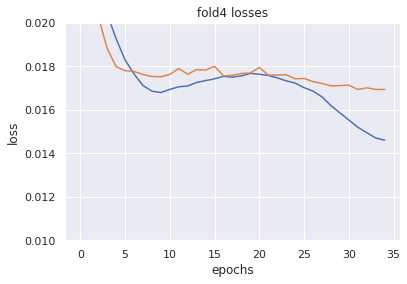

==========FOLD5==========
-----EPOCH1-----
train_loss: 0.73848, train_metric: 0.73847
valid_loss: 0.64482, valid_metric: 0.64477
-----EPOCH2-----
train_loss: 0.26983, train_metric: 0.26889
valid_loss: 0.03510, valid_metric: 0.03309
-----EPOCH3-----
train_loss: 0.02846, train_metric: 0.02600
valid_loss: 0.02311, valid_metric: 0.02034
-----EPOCH4-----
train_loss: 0.02338, train_metric: 0.02044
valid_loss: 0.02187, valid_metric: 0.01881
-----EPOCH5-----
train_loss: 0.02219, train_metric: 0.01906
valid_loss: 0.02179, valid_metric: 0.01864
-----EPOCH6-----
train_loss: 0.02146, train_metric: 0.01824
valid_loss: 0.02121, valid_metric: 0.01794
-----EPOCH7-----
train_loss: 0.02087, train_metric: 0.01763
valid_loss: 0.02089, valid_metric: 0.01767
-----EPOCH8-----
train_loss: 0.02023, train_metric: 0.01699
valid_loss: 0.02077, valid_metric: 0.01754
-----EPOCH9-----
train_loss: 0.02007, train_metric: 0.01683
valid_loss: 0.02079, valid_metric: 0.01761
-----EPOCH10-----
train_loss: 0.01997, train_me

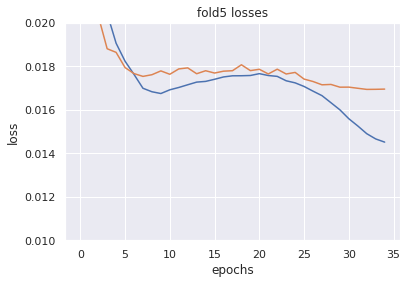

In [31]:
# Averaging on multiple SEEDS

SEED = [0, 1, 2]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))
CVs = list()

print(f'device used: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_, CVs_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    CVs += CVs_
    
train[target_cols] = oof
test[target_cols] = predictions

In [32]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f} +/- {np.std(CVs):.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.015629 +/- 0.000314
AUC: 0.677402


In [33]:
file_path = 'oof_Simple.npy'
np.save(file_path, oof)

submission_Simple2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [34]:
submission_Simple = submission_Simple1 * 0.7 + submission_Simple2 * 0.3

## Model ResNet

In [35]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 128
BATCH_SIZE_nonscored = 512
LEARNING_RATE = 1e-2
WEIGHT_DECAY = 1e-5
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
EARLY_STOPPING_STEPS_nonscored = 4
EARLY_STOP_nonscored = True
smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

num_features_1 = len(feature_cols)
num_features_2 = len(predictors)
num_targets = len(target_cols)
hidden_1 = 256
hidden_2 = 256

In [36]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1: 
            inputs1 = inputs[:, :-len(predictors)]
            inputs2 = inputs[:, -len(predictors):]
            outputs = model(inputs1, inputs2)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()
        
            final_loss += loss.item()
            final_metric += metric.item()
            
        else:
            rejected += len(inputs)
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [37]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        inputs1 = inputs[:, :-len(predictors)]
        inputs2 = inputs[:, -len(predictors):]
        outputs = model(inputs1, inputs2)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [38]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        inputs1 = inputs[:, :-len(predictors)]
        inputs2 = inputs[:, -len(predictors):]
        
        with torch.no_grad():
            outputs = model(inputs1, inputs2)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

In [39]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    train_losses_nonscored = list()
    valid_losses_nonscored = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train[f'seed{seed}'] != fold].index
    val_idx = train[train[f'seed{seed}'] == fold].index
    
    train_df = train[train[f'seed{seed}'] != fold].reset_index()
    valid_df = train[train[f'seed{seed}'] == fold].reset_index()
    
    x_train, y_train, y_train_nonscored = train_df[feature_cols].values, train_df[target_cols].values, train_df[target_nonscored_cols].values
    x_valid, y_valid, y_valid_nonscored = valid_df[feature_cols].values, valid_df[target_cols].values, valid_df[target_nonscored_cols].values
    
    x_train2 = train_df[predictors].values
    x_valid2 = valid_df[predictors].values
    
    x_train = np.concatenate([x_train, x_train2], axis=1)
    x_valid = np.concatenate([x_valid, x_valid2], axis=1)
    
    train_dataset = MoADataset(x_train, y_train)
    train_dataset_nonscored = MoADataset(x_train, y_train_nonscored)
    valid_dataset = MoADataset(x_valid, y_valid)
    valid_dataset_nonscored = MoADataset(x_valid, y_valid_nonscored)
    
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    trainloader_nonscored = torch.utils.data.DataLoader(train_dataset_nonscored, batch_size=BATCH_SIZE_nonscored, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    validloader_nonscored = torch.utils.data.DataLoader(valid_dataset_nonscored, batch_size=BATCH_SIZE_nonscored, shuffle=False)
    
    model = Model_ResNet(num_features_1=num_features_1,
                      num_features_2=num_features_2, 
                      num_targets=num_targets, 
                      hidden_1=hidden_1,
                      hidden_2=hidden_2)
    

    model.to(DEVICE)
    
    optimizer_nonscored = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler_nonscored = optim.lr_scheduler.OneCycleLR(optimizer=optimizer_nonscored, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader_nonscored)) 
    
    loss_fn = nn.BCEWithLogitsLoss()
    loss_tr = SmoothBCEwLogits(smoothing=smoothing)
    
    early_stoppping_steps = EARLY_STOPPING_STEPS
    early_step = 0
    early_step_nonscored = 0
    
    oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    print('nonscored-loop')
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer_nonscored, scheduler_nonscored, loss_tr, loss_fn, trainloader_nonscored, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses_nonscored.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader_nonscored, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses_nonscored.append(valid_metric)
        
        if valid_loss < best_loss:
            
            early_step_nonscored = 0
            best_loss = valid_loss
#             oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'ResNet_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP_nonscored == True):
            
            early_step_nonscored += 1
            if (early_step_nonscored >= EARLY_STOPPING_STEPS_nonscored):
                print('early_stopping')
                break
    
    plt.plot(train_losses_nonscored, label='train_losses')
    plt.plot(valid_losses_nonscored, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-3, 1e-2])
    plt.title(f'fold{fold+1} losses')
    plt.legend(loc='best')
    plt.show()
    
    
    model.load_state_dict(torch.load(f'ResNet_FOLD{fold+1}_SEED{seed}.pth'))
    model.Linear3_2 = nn.Linear(hidden_2, num_targets)
    model.to(DEVICE)
    
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, pct_start=0.3, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader)) 
    
    best_loss = np.inf
    
    print('scored_loop')
    
    for epoch in range(EPOCHS):
        
        print(f'-----EPOCH{epoch+1}-----')
        
        train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
        print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
        train_losses.append(train_metric)
        valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
        print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
        valid_losses.append(valid_metric)
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f'ResNet_FOLD{fold+1}_SEED{seed}.pth')
            
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= EARLY_STOPPING_STEPS):
                break
                
    y_true = train_targets_scored[target_cols].values

    cv = 0
    for i in range(len(target_cols)):
        cv_ = log_loss(y_true[val_idx, i], oof[val_idx, i], labels=[0, 1])
        cv += cv_ / len(target_cols)
                
    plt.plot(train_losses, label='train_losses')
    plt.plot(valid_losses, label='valid_losses')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim([1e-2, 2e-2])
    plt.title(f'fold{fold+1} losses')
    plt.legend(loc='best')
    plt.show()
                
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    x_test2 = test_[predictors].values
    
    x_test = np.concatenate([x_test, x_test2], axis=1)
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model_ResNet(num_features_1=num_features_1,
                      num_features_2=num_features_2, 
                      num_targets=num_targets, 
                      hidden_1=hidden_1,
                      hidden_2=hidden_2)
    
    model.load_state_dict(torch.load(f'ResNet_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions, cv

In [40]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    CVs = list()
    
    for fold in range(NFOLDS):
        oof_, pred_, cv_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        CVs.append(cv_)
        
    return oof, predictions, CVs

used device: cuda
 
SEED : 0

==========FOLD1==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72605, train_metric: 0.72605
valid_loss: 0.69984, valid_metric: 0.69983
-----EPOCH2-----
train_loss: 0.69180, train_metric: 0.69179
valid_loss: 0.68141, valid_metric: 0.68139
-----EPOCH3-----
train_loss: 0.52136, train_metric: 0.52115
valid_loss: 0.23172, valid_metric: 0.23104
-----EPOCH4-----
train_loss: 0.06209, train_metric: 0.06030
valid_loss: 0.01223, valid_metric: 0.00941
-----EPOCH5-----
train_loss: 0.01092, train_metric: 0.00779
valid_loss: 0.01136, valid_metric: 0.00809
-----EPOCH6-----
train_loss: 0.01064, train_metric: 0.00738
valid_loss: 0.01136, valid_metric: 0.00811
-----EPOCH7-----
train_loss: 0.01063, train_metric: 0.00742
valid_loss: 0.01137, valid_metric: 0.00816
-----EPOCH8-----
train_loss: 0.01056, train_metric: 0.00740
valid_loss: 0.01138, valid_metric: 0.00819
-----EPOCH9-----
train_loss: 0.01054, train_metric: 0.00737
valid_loss: 0.01136, valid_metric: 0.00807
ea

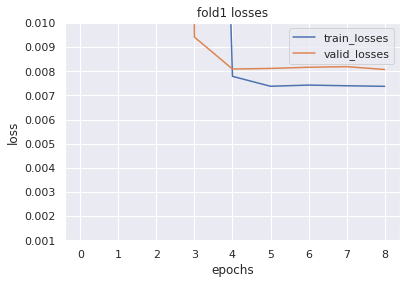

scored_loop
-----EPOCH1-----
train_loss: 0.64227, train_metric: 0.64219
valid_loss: 0.44509, valid_metric: 0.44478
-----EPOCH2-----
train_loss: 0.17970, train_metric: 0.17870
valid_loss: 0.04283, valid_metric: 0.04108
-----EPOCH3-----
train_loss: 0.02870, train_metric: 0.02648
valid_loss: 0.02259, valid_metric: 0.02002
-----EPOCH4-----
train_loss: 0.02201, train_metric: 0.01927
valid_loss: 0.02141, valid_metric: 0.01850
-----EPOCH5-----
train_loss: 0.02120, train_metric: 0.01824
valid_loss: 0.02075, valid_metric: 0.01777
-----EPOCH6-----
train_loss: 0.02094, train_metric: 0.01790
valid_loss: 0.02067, valid_metric: 0.01751
-----EPOCH7-----
train_loss: 0.02095, train_metric: 0.01789
valid_loss: 0.02104, valid_metric: 0.01806
-----EPOCH8-----
train_loss: 0.02088, train_metric: 0.01782
valid_loss: 0.02087, valid_metric: 0.01775
-----EPOCH9-----
train_loss: 0.02090, train_metric: 0.01784
valid_loss: 0.02080, valid_metric: 0.01781
-----EPOCH10-----
train_loss: 0.02097, train_metric: 0.01792


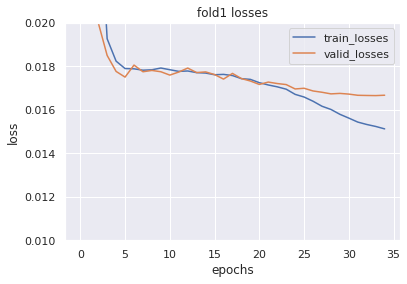

==========FOLD2==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72605, train_metric: 0.72605
valid_loss: 0.69875, valid_metric: 0.69874
-----EPOCH2-----
train_loss: 0.69192, train_metric: 0.69191
valid_loss: 0.68152, valid_metric: 0.68150
-----EPOCH3-----
train_loss: 0.52272, train_metric: 0.52251
valid_loss: 0.23626, valid_metric: 0.23559
-----EPOCH4-----
train_loss: 0.06273, train_metric: 0.06095
valid_loss: 0.01209, valid_metric: 0.00929
-----EPOCH5-----
train_loss: 0.01098, train_metric: 0.00784
valid_loss: 0.01112, valid_metric: 0.00786
-----EPOCH6-----
train_loss: 0.01066, train_metric: 0.00740
valid_loss: 0.01115, valid_metric: 0.00796
-----EPOCH7-----
train_loss: 0.01063, train_metric: 0.00743
valid_loss: 0.01125, valid_metric: 0.00814
-----EPOCH8-----
train_loss: 0.01059, train_metric: 0.00741
valid_loss: 0.01120, valid_metric: 0.00794
-----EPOCH9-----
train_loss: 0.01059, train_metric: 0.00741
valid_loss: 0.01125, valid_metric: 0.00806
early_stopping


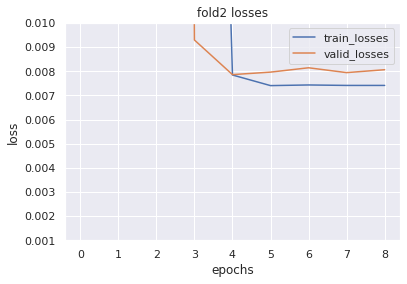

scored_loop
-----EPOCH1-----
train_loss: 0.63764, train_metric: 0.63756
valid_loss: 0.43926, valid_metric: 0.43895
-----EPOCH2-----
train_loss: 0.17778, train_metric: 0.17678
valid_loss: 0.04160, valid_metric: 0.03982
-----EPOCH3-----
train_loss: 0.02868, train_metric: 0.02647
valid_loss: 0.02325, valid_metric: 0.02065
-----EPOCH4-----
train_loss: 0.02189, train_metric: 0.01915
valid_loss: 0.02176, valid_metric: 0.01882
-----EPOCH5-----
train_loss: 0.02097, train_metric: 0.01801
valid_loss: 0.02179, valid_metric: 0.01892
-----EPOCH6-----
train_loss: 0.02080, train_metric: 0.01775
valid_loss: 0.02171, valid_metric: 0.01868
-----EPOCH7-----
train_loss: 0.02074, train_metric: 0.01768
valid_loss: 0.02135, valid_metric: 0.01818
-----EPOCH8-----
train_loss: 0.02075, train_metric: 0.01769
valid_loss: 0.02140, valid_metric: 0.01829
-----EPOCH9-----
train_loss: 0.02074, train_metric: 0.01769
valid_loss: 0.02138, valid_metric: 0.01834
-----EPOCH10-----
train_loss: 0.02070, train_metric: 0.01764


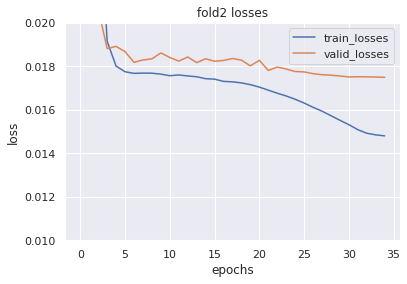

==========FOLD3==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72613, train_metric: 0.72613
valid_loss: 0.70006, valid_metric: 0.70006
-----EPOCH2-----
train_loss: 0.69201, train_metric: 0.69200
valid_loss: 0.68062, valid_metric: 0.68060
-----EPOCH3-----
train_loss: 0.52218, train_metric: 0.52197
valid_loss: 0.23729, valid_metric: 0.23662
-----EPOCH4-----
train_loss: 0.06247, train_metric: 0.06069
valid_loss: 0.01126, valid_metric: 0.00845
-----EPOCH5-----
train_loss: 0.01115, train_metric: 0.00802
valid_loss: 0.01027, valid_metric: 0.00699
-----EPOCH6-----
train_loss: 0.01087, train_metric: 0.00761
valid_loss: 0.01033, valid_metric: 0.00711
-----EPOCH7-----
train_loss: 0.01086, train_metric: 0.00766
valid_loss: 0.01053, valid_metric: 0.00743
-----EPOCH8-----
train_loss: 0.01083, train_metric: 0.00766
valid_loss: 0.01035, valid_metric: 0.00717
-----EPOCH9-----
train_loss: 0.01077, train_metric: 0.00760
valid_loss: 0.01066, valid_metric: 0.00754
early_stopping


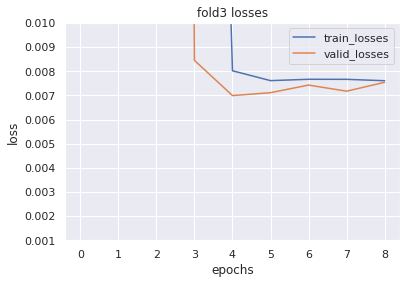

scored_loop
-----EPOCH1-----
train_loss: 0.64964, train_metric: 0.64956
valid_loss: 0.44955, valid_metric: 0.44925
-----EPOCH2-----
train_loss: 0.18104, train_metric: 0.18004
valid_loss: 0.04135, valid_metric: 0.03957
-----EPOCH3-----
train_loss: 0.02861, train_metric: 0.02640
valid_loss: 0.02385, valid_metric: 0.02136
-----EPOCH4-----
train_loss: 0.02199, train_metric: 0.01925
valid_loss: 0.02162, valid_metric: 0.01875
-----EPOCH5-----
train_loss: 0.02116, train_metric: 0.01821
valid_loss: 0.02102, valid_metric: 0.01794
-----EPOCH6-----
train_loss: 0.02093, train_metric: 0.01789
valid_loss: 0.02191, valid_metric: 0.01893
-----EPOCH7-----
train_loss: 0.02097, train_metric: 0.01791
valid_loss: 0.02105, valid_metric: 0.01785
-----EPOCH8-----
train_loss: 0.02090, train_metric: 0.01784
valid_loss: 0.02087, valid_metric: 0.01778
-----EPOCH9-----
train_loss: 0.02091, train_metric: 0.01786
valid_loss: 0.02121, valid_metric: 0.01821
-----EPOCH10-----
train_loss: 0.02082, train_metric: 0.01777


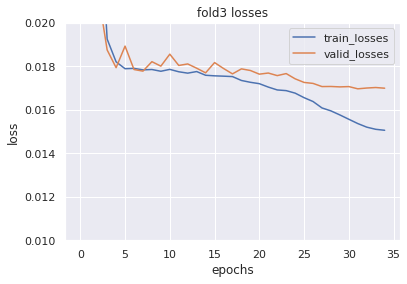

==========FOLD4==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72603, train_metric: 0.72603
valid_loss: 0.69905, valid_metric: 0.69905
-----EPOCH2-----
train_loss: 0.69185, train_metric: 0.69184
valid_loss: 0.68045, valid_metric: 0.68043
-----EPOCH3-----
train_loss: 0.52219, train_metric: 0.52198
valid_loss: 0.23601, valid_metric: 0.23534
-----EPOCH4-----
train_loss: 0.06268, train_metric: 0.06090
valid_loss: 0.01177, valid_metric: 0.00897
-----EPOCH5-----
train_loss: 0.01104, train_metric: 0.00791
valid_loss: 0.01072, valid_metric: 0.00741
-----EPOCH6-----
train_loss: 0.01078, train_metric: 0.00752
valid_loss: 0.01073, valid_metric: 0.00752
-----EPOCH7-----
train_loss: 0.01077, train_metric: 0.00757
valid_loss: 0.01068, valid_metric: 0.00745
-----EPOCH8-----
train_loss: 0.01072, train_metric: 0.00755
valid_loss: 0.01065, valid_metric: 0.00741
-----EPOCH9-----
train_loss: 0.01066, train_metric: 0.00749
valid_loss: 0.01093, valid_metric: 0.00786
-----EPOCH10-----
train_loss: 0.

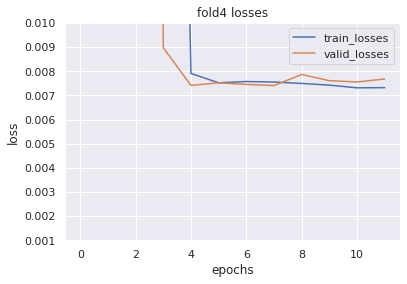

scored_loop
-----EPOCH1-----
train_loss: 0.63242, train_metric: 0.63232
valid_loss: 0.42754, valid_metric: 0.42721
-----EPOCH2-----
train_loss: 0.17204, train_metric: 0.17102
valid_loss: 0.04281, valid_metric: 0.04106
-----EPOCH3-----
train_loss: 0.02868, train_metric: 0.02648
valid_loss: 0.02309, valid_metric: 0.02055
-----EPOCH4-----
train_loss: 0.02180, train_metric: 0.01907
valid_loss: 0.02145, valid_metric: 0.01861
-----EPOCH5-----
train_loss: 0.02091, train_metric: 0.01796
valid_loss: 0.02160, valid_metric: 0.01834
-----EPOCH6-----
train_loss: 0.02078, train_metric: 0.01774
valid_loss: 0.02148, valid_metric: 0.01852
-----EPOCH7-----
train_loss: 0.02080, train_metric: 0.01774
valid_loss: 0.02181, valid_metric: 0.01867
-----EPOCH8-----
train_loss: 0.02079, train_metric: 0.01773
valid_loss: 0.02107, valid_metric: 0.01800
-----EPOCH9-----
train_loss: 0.02076, train_metric: 0.01771
valid_loss: 0.02135, valid_metric: 0.01830
-----EPOCH10-----
train_loss: 0.02075, train_metric: 0.01770


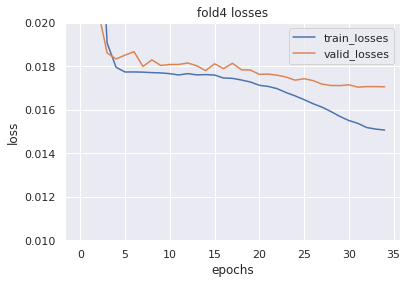

==========FOLD5==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72613, train_metric: 0.72613
valid_loss: 0.69928, valid_metric: 0.69927
-----EPOCH2-----
train_loss: 0.69186, train_metric: 0.69185
valid_loss: 0.68289, valid_metric: 0.68287
-----EPOCH3-----
train_loss: 0.52242, train_metric: 0.52221
valid_loss: 0.23730, valid_metric: 0.23663
-----EPOCH4-----
train_loss: 0.06275, train_metric: 0.06097
valid_loss: 0.01224, valid_metric: 0.00945
-----EPOCH5-----
train_loss: 0.01092, train_metric: 0.00779
valid_loss: 0.01122, valid_metric: 0.00792
-----EPOCH6-----
train_loss: 0.01063, train_metric: 0.00737
valid_loss: 0.01124, valid_metric: 0.00799
-----EPOCH7-----
train_loss: 0.01066, train_metric: 0.00745
valid_loss: 0.01129, valid_metric: 0.00811
-----EPOCH8-----
train_loss: 0.01060, train_metric: 0.00742
valid_loss: 0.01127, valid_metric: 0.00801
-----EPOCH9-----
train_loss: 0.01057, train_metric: 0.00740
valid_loss: 0.01131, valid_metric: 0.00813
early_stopping


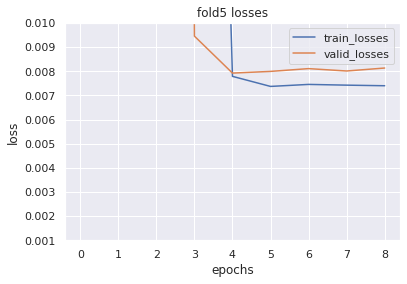

scored_loop
-----EPOCH1-----
train_loss: 0.63683, train_metric: 0.63675
valid_loss: 0.43736, valid_metric: 0.43704
-----EPOCH2-----
train_loss: 0.17666, train_metric: 0.17565
valid_loss: 0.04201, valid_metric: 0.04024
-----EPOCH3-----
train_loss: 0.02884, train_metric: 0.02662
valid_loss: 0.02315, valid_metric: 0.02054
-----EPOCH4-----
train_loss: 0.02209, train_metric: 0.01935
valid_loss: 0.02171, valid_metric: 0.01886
-----EPOCH5-----
train_loss: 0.02110, train_metric: 0.01814
valid_loss: 0.02168, valid_metric: 0.01863
-----EPOCH6-----
train_loss: 0.02095, train_metric: 0.01791
valid_loss: 0.02142, valid_metric: 0.01836
-----EPOCH7-----
train_loss: 0.02088, train_metric: 0.01781
valid_loss: 0.02122, valid_metric: 0.01822
-----EPOCH8-----
train_loss: 0.02088, train_metric: 0.01782
valid_loss: 0.02130, valid_metric: 0.01819
-----EPOCH9-----
train_loss: 0.02086, train_metric: 0.01780
valid_loss: 0.02163, valid_metric: 0.01861
-----EPOCH10-----
train_loss: 0.02121, train_metric: 0.01817


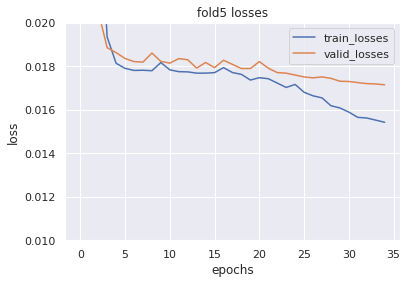

 
SEED : 1

==========FOLD1==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72649, train_metric: 0.72649
valid_loss: 0.70291, valid_metric: 0.70291
-----EPOCH2-----
train_loss: 0.69255, train_metric: 0.69254
valid_loss: 0.66832, valid_metric: 0.66828
-----EPOCH3-----
train_loss: 0.52642, train_metric: 0.52622
valid_loss: 0.23588, valid_metric: 0.23521
-----EPOCH4-----
train_loss: 0.06470, train_metric: 0.06294
valid_loss: 0.01259, valid_metric: 0.00981
-----EPOCH5-----
train_loss: 0.01090, train_metric: 0.00777
valid_loss: 0.01154, valid_metric: 0.00828
-----EPOCH6-----
train_loss: 0.01066, train_metric: 0.00740
valid_loss: 0.01148, valid_metric: 0.00823
-----EPOCH7-----
train_loss: 0.01059, train_metric: 0.00738
valid_loss: 0.01148, valid_metric: 0.00826
-----EPOCH8-----
train_loss: 0.01052, train_metric: 0.00735
valid_loss: 0.01158, valid_metric: 0.00849
-----EPOCH9-----
train_loss: 0.01048, train_metric: 0.00731
valid_loss: 0.01151, valid_metric: 0.00829
-----EPOCH10-----
tr

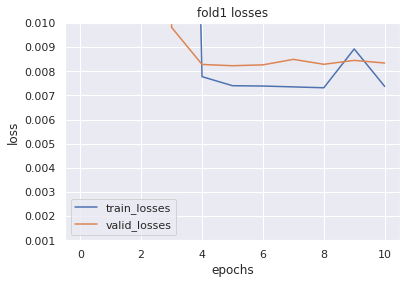

scored_loop
-----EPOCH1-----
train_loss: 0.64555, train_metric: 0.64547
valid_loss: 0.44140, valid_metric: 0.44109
-----EPOCH2-----
train_loss: 0.17684, train_metric: 0.17584
valid_loss: 0.04268, valid_metric: 0.04093
-----EPOCH3-----
train_loss: 0.02876, train_metric: 0.02655
valid_loss: 0.02371, valid_metric: 0.02120
-----EPOCH4-----
train_loss: 0.02193, train_metric: 0.01920
valid_loss: 0.02168, valid_metric: 0.01891
-----EPOCH5-----
train_loss: 0.02101, train_metric: 0.01805
valid_loss: 0.02109, valid_metric: 0.01808
-----EPOCH6-----
train_loss: 0.02086, train_metric: 0.01781
valid_loss: 0.02128, valid_metric: 0.01826
-----EPOCH7-----
train_loss: 0.02080, train_metric: 0.01773
valid_loss: 0.02104, valid_metric: 0.01803
-----EPOCH8-----
train_loss: 0.02070, train_metric: 0.01763
valid_loss: 0.02129, valid_metric: 0.01833
-----EPOCH9-----
train_loss: 0.02079, train_metric: 0.01773
valid_loss: 0.02151, valid_metric: 0.01829
-----EPOCH10-----
train_loss: 0.02086, train_metric: 0.01781


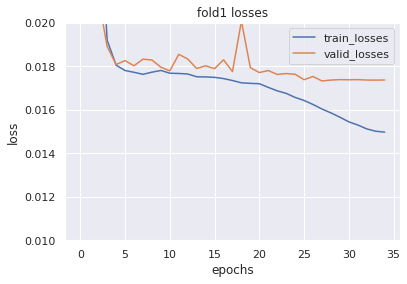

==========FOLD2==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72641, train_metric: 0.72641
valid_loss: 0.70173, valid_metric: 0.70172
-----EPOCH2-----
train_loss: 0.69269, train_metric: 0.69268
valid_loss: 0.66848, valid_metric: 0.66845
-----EPOCH3-----
train_loss: 0.52626, train_metric: 0.52606
valid_loss: 0.23727, valid_metric: 0.23660
-----EPOCH4-----
train_loss: 0.06467, train_metric: 0.06290
valid_loss: 0.01163, valid_metric: 0.00884
-----EPOCH5-----
train_loss: 0.01114, train_metric: 0.00801
valid_loss: 0.01047, valid_metric: 0.00719
-----EPOCH6-----
train_loss: 0.01088, train_metric: 0.00763
valid_loss: 0.01058, valid_metric: 0.00745
-----EPOCH7-----
train_loss: 0.01079, train_metric: 0.00759
valid_loss: 0.01055, valid_metric: 0.00743
-----EPOCH8-----
train_loss: 0.01075, train_metric: 0.00758
valid_loss: 0.01061, valid_metric: 0.00752
-----EPOCH9-----
train_loss: 0.01071, train_metric: 0.00755
valid_loss: 0.01047, valid_metric: 0.00729
early_stopping


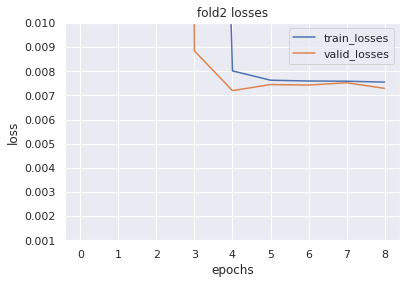

scored_loop
-----EPOCH1-----
train_loss: 0.64505, train_metric: 0.64497
valid_loss: 0.44252, valid_metric: 0.44221
-----EPOCH2-----
train_loss: 0.17830, train_metric: 0.17730
valid_loss: 0.04213, valid_metric: 0.04037
-----EPOCH3-----
train_loss: 0.02845, train_metric: 0.02622
valid_loss: 0.02327, valid_metric: 0.02077
-----EPOCH4-----
train_loss: 0.02192, train_metric: 0.01917
valid_loss: 0.02159, valid_metric: 0.01866
-----EPOCH5-----
train_loss: 0.02107, train_metric: 0.01810
valid_loss: 0.02130, valid_metric: 0.01840
-----EPOCH6-----
train_loss: 0.02088, train_metric: 0.01783
valid_loss: 0.02121, valid_metric: 0.01820
-----EPOCH7-----
train_loss: 0.02081, train_metric: 0.01774
valid_loss: 0.02113, valid_metric: 0.01812
-----EPOCH8-----
train_loss: 0.02080, train_metric: 0.01774
valid_loss: 0.02161, valid_metric: 0.01849
-----EPOCH9-----
train_loss: 0.02077, train_metric: 0.01772
valid_loss: 0.02087, valid_metric: 0.01778
-----EPOCH10-----
train_loss: 0.02079, train_metric: 0.01774


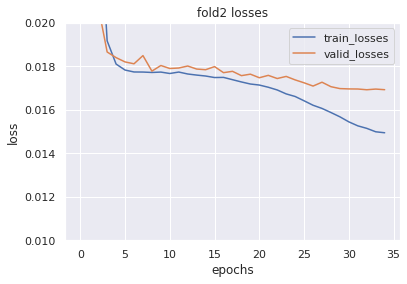

==========FOLD3==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72653, train_metric: 0.72653
valid_loss: 0.70369, valid_metric: 0.70369
-----EPOCH2-----
train_loss: 0.69271, train_metric: 0.69270
valid_loss: 0.66981, valid_metric: 0.66978
-----EPOCH3-----
train_loss: 0.52703, train_metric: 0.52683
valid_loss: 0.24064, valid_metric: 0.23998
-----EPOCH4-----
train_loss: 0.06510, train_metric: 0.06334
valid_loss: 0.01197, valid_metric: 0.00918
-----EPOCH5-----
train_loss: 0.01102, train_metric: 0.00789
valid_loss: 0.01086, valid_metric: 0.00761
-----EPOCH6-----
train_loss: 0.01081, train_metric: 0.00755
valid_loss: 0.01093, valid_metric: 0.00776
-----EPOCH7-----
train_loss: 0.01074, train_metric: 0.00755
valid_loss: 0.01099, valid_metric: 0.00785
-----EPOCH8-----
train_loss: 0.01070, train_metric: 0.00753
valid_loss: 0.01105, valid_metric: 0.00794
-----EPOCH9-----
train_loss: 0.01066, train_metric: 0.00749
valid_loss: 0.01107, valid_metric: 0.00797
early_stopping


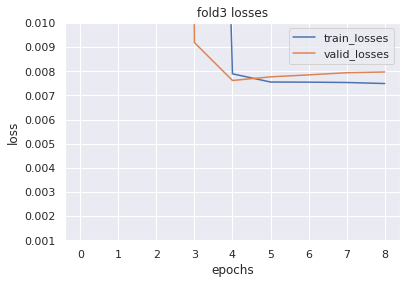

scored_loop
-----EPOCH1-----
train_loss: 0.64520, train_metric: 0.64512
valid_loss: 0.43803, valid_metric: 0.43772
-----EPOCH2-----
train_loss: 0.17691, train_metric: 0.17589
valid_loss: 0.04107, valid_metric: 0.03928
-----EPOCH3-----
train_loss: 0.02826, train_metric: 0.02603
valid_loss: 0.02321, valid_metric: 0.02064
-----EPOCH4-----
train_loss: 0.02187, train_metric: 0.01912
valid_loss: 0.02169, valid_metric: 0.01876
-----EPOCH5-----
train_loss: 0.02105, train_metric: 0.01808
valid_loss: 0.02155, valid_metric: 0.01855
-----EPOCH6-----
train_loss: 0.02092, train_metric: 0.01787
valid_loss: 0.02208, valid_metric: 0.01908
-----EPOCH7-----
train_loss: 0.02088, train_metric: 0.01781
valid_loss: 0.02187, valid_metric: 0.01879
-----EPOCH8-----
train_loss: 0.02083, train_metric: 0.01776
valid_loss: 0.02170, valid_metric: 0.01867
-----EPOCH9-----
train_loss: 0.02083, train_metric: 0.01777
valid_loss: 0.02150, valid_metric: 0.01845
-----EPOCH10-----
train_loss: 0.02088, train_metric: 0.01783


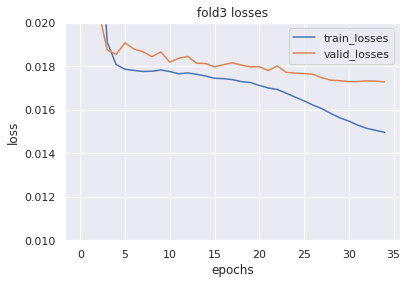

==========FOLD4==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72646, train_metric: 0.72646
valid_loss: 0.70213, valid_metric: 0.70212
-----EPOCH2-----
train_loss: 0.69257, train_metric: 0.69256
valid_loss: 0.66737, valid_metric: 0.66734
-----EPOCH3-----
train_loss: 0.52518, train_metric: 0.52497
valid_loss: 0.23386, valid_metric: 0.23318
-----EPOCH4-----
train_loss: 0.06411, train_metric: 0.06233
valid_loss: 0.01208, valid_metric: 0.00929
-----EPOCH5-----
train_loss: 0.01104, train_metric: 0.00791
valid_loss: 0.01097, valid_metric: 0.00772
-----EPOCH6-----
train_loss: 0.01078, train_metric: 0.00752
valid_loss: 0.01100, valid_metric: 0.00780
-----EPOCH7-----
train_loss: 0.01071, train_metric: 0.00751
valid_loss: 0.01096, valid_metric: 0.00773
-----EPOCH8-----
train_loss: 0.01064, train_metric: 0.00747
valid_loss: 0.01115, valid_metric: 0.00807
-----EPOCH9-----
train_loss: 0.01060, train_metric: 0.00743
valid_loss: 0.01130, valid_metric: 0.00828
-----EPOCH10-----
train_loss: 0.

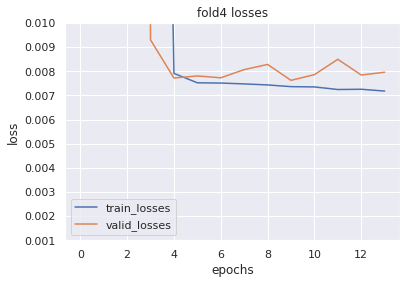

scored_loop
-----EPOCH1-----
train_loss: 0.62428, train_metric: 0.62418
valid_loss: 0.41347, valid_metric: 0.41312
-----EPOCH2-----
train_loss: 0.16585, train_metric: 0.16481
valid_loss: 0.04164, valid_metric: 0.03987
-----EPOCH3-----
train_loss: 0.02864, train_metric: 0.02644
valid_loss: 0.02300, valid_metric: 0.02046
-----EPOCH4-----
train_loss: 0.02186, train_metric: 0.01913
valid_loss: 0.02134, valid_metric: 0.01845
-----EPOCH5-----
train_loss: 0.02098, train_metric: 0.01802
valid_loss: 0.02103, valid_metric: 0.01790
-----EPOCH6-----
train_loss: 0.02070, train_metric: 0.01766
valid_loss: 0.02123, valid_metric: 0.01813
-----EPOCH7-----
train_loss: 0.02072, train_metric: 0.01765
valid_loss: 0.02103, valid_metric: 0.01792
-----EPOCH8-----
train_loss: 0.02068, train_metric: 0.01762
valid_loss: 0.02094, valid_metric: 0.01791
-----EPOCH9-----
train_loss: 0.02065, train_metric: 0.01759
valid_loss: 0.02130, valid_metric: 0.01817
-----EPOCH10-----
train_loss: 0.02071, train_metric: 0.01765


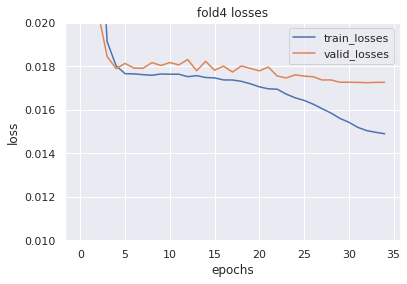

==========FOLD5==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72645, train_metric: 0.72645
valid_loss: 0.70292, valid_metric: 0.70292
-----EPOCH2-----
train_loss: 0.69266, train_metric: 0.69265
valid_loss: 0.66895, valid_metric: 0.66892
-----EPOCH3-----
train_loss: 0.52624, train_metric: 0.52603
valid_loss: 0.23956, valid_metric: 0.23890
-----EPOCH4-----
train_loss: 0.06466, train_metric: 0.06289
valid_loss: 0.01210, valid_metric: 0.00932
-----EPOCH5-----
train_loss: 0.01107, train_metric: 0.00794
valid_loss: 0.01094, valid_metric: 0.00767
-----EPOCH6-----
train_loss: 0.01073, train_metric: 0.00747
valid_loss: 0.01095, valid_metric: 0.00776
-----EPOCH7-----
train_loss: 0.01072, train_metric: 0.00752
valid_loss: 0.01103, valid_metric: 0.00790
-----EPOCH8-----
train_loss: 0.01065, train_metric: 0.00748
valid_loss: 0.01103, valid_metric: 0.00788
-----EPOCH9-----
train_loss: 0.01101, train_metric: 0.00782
valid_loss: 0.01101, valid_metric: 0.00771
early_stopping


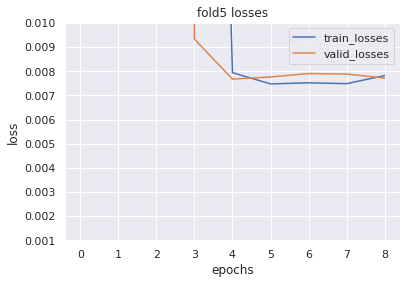

scored_loop
-----EPOCH1-----
train_loss: 0.64204, train_metric: 0.64195
valid_loss: 0.44071, valid_metric: 0.44040
-----EPOCH2-----
train_loss: 0.17771, train_metric: 0.17670
valid_loss: 0.04241, valid_metric: 0.04065
-----EPOCH3-----
train_loss: 0.02864, train_metric: 0.02641
valid_loss: 0.02302, valid_metric: 0.02048
-----EPOCH4-----
train_loss: 0.02206, train_metric: 0.01932
valid_loss: 0.02151, valid_metric: 0.01864
-----EPOCH5-----
train_loss: 0.02121, train_metric: 0.01825
valid_loss: 0.02147, valid_metric: 0.01856
-----EPOCH6-----
train_loss: 0.02108, train_metric: 0.01803
valid_loss: 0.02128, valid_metric: 0.01837
-----EPOCH7-----
train_loss: 0.02107, train_metric: 0.01800
valid_loss: 0.02135, valid_metric: 0.01821
-----EPOCH8-----
train_loss: 0.02098, train_metric: 0.01793
valid_loss: 0.02148, valid_metric: 0.01828
-----EPOCH9-----
train_loss: 0.02099, train_metric: 0.01794
valid_loss: 0.02096, valid_metric: 0.01790
-----EPOCH10-----
train_loss: 0.02123, train_metric: 0.01820


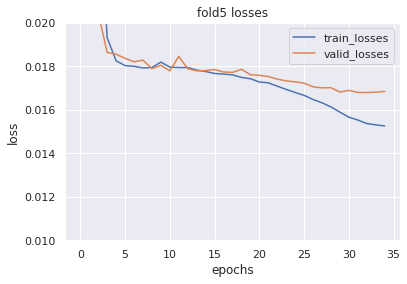

 
SEED : 2

==========FOLD1==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72798, train_metric: 0.72798
valid_loss: 0.70475, valid_metric: 0.70475
-----EPOCH2-----
train_loss: 0.69365, train_metric: 0.69364
valid_loss: 0.68792, valid_metric: 0.68791
-----EPOCH3-----
train_loss: 0.52354, train_metric: 0.52333
valid_loss: 0.23683, valid_metric: 0.23616
-----EPOCH4-----
train_loss: 0.06309, train_metric: 0.06132
valid_loss: 0.01203, valid_metric: 0.00922
-----EPOCH5-----
train_loss: 0.01099, train_metric: 0.00786
valid_loss: 0.01102, valid_metric: 0.00769
-----EPOCH6-----
train_loss: 0.01073, train_metric: 0.00748
valid_loss: 0.01102, valid_metric: 0.00782
-----EPOCH7-----
train_loss: 0.01073, train_metric: 0.00753
valid_loss: 0.01111, valid_metric: 0.00797
-----EPOCH8-----
train_loss: 0.01070, train_metric: 0.00754
valid_loss: 0.01116, valid_metric: 0.00806
-----EPOCH9-----
train_loss: 0.01069, train_metric: 0.00752
valid_loss: 0.01105, valid_metric: 0.00785
early_stopping


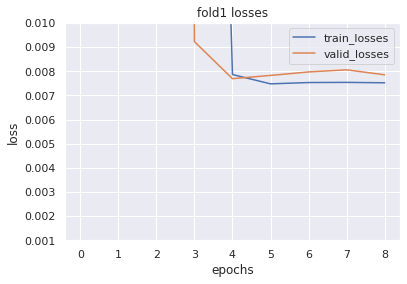

scored_loop
-----EPOCH1-----
train_loss: 0.64410, train_metric: 0.64401
valid_loss: 0.44832, valid_metric: 0.44802
-----EPOCH2-----
train_loss: 0.18071, train_metric: 0.17972
valid_loss: 0.04293, valid_metric: 0.04118
-----EPOCH3-----
train_loss: 0.02889, train_metric: 0.02668
valid_loss: 0.02338, valid_metric: 0.02089
-----EPOCH4-----
train_loss: 0.02201, train_metric: 0.01928
valid_loss: 0.02140, valid_metric: 0.01855
-----EPOCH5-----
train_loss: 0.02125, train_metric: 0.01829
valid_loss: 0.02104, valid_metric: 0.01804
-----EPOCH6-----
train_loss: 0.02100, train_metric: 0.01797
valid_loss: 0.02126, valid_metric: 0.01826
-----EPOCH7-----
train_loss: 0.02099, train_metric: 0.01793
valid_loss: 0.02107, valid_metric: 0.01795
-----EPOCH8-----
train_loss: 0.02087, train_metric: 0.01782
valid_loss: 0.02098, valid_metric: 0.01798
-----EPOCH9-----
train_loss: 0.02088, train_metric: 0.01782
valid_loss: 0.02112, valid_metric: 0.01786
-----EPOCH10-----
train_loss: 0.02081, train_metric: 0.01777


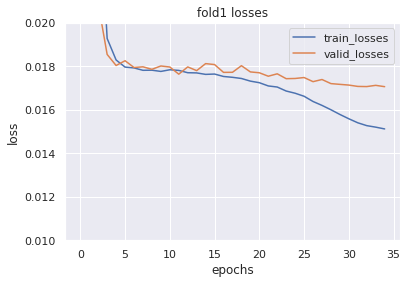

==========FOLD2==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72791, train_metric: 0.72791
valid_loss: 0.70429, valid_metric: 0.70428
-----EPOCH2-----
train_loss: 0.69358, train_metric: 0.69358
valid_loss: 0.69077, valid_metric: 0.69076
-----EPOCH3-----
train_loss: 0.52309, train_metric: 0.52289
valid_loss: 0.24597, valid_metric: 0.24532
-----EPOCH4-----
train_loss: 0.06286, train_metric: 0.06108
valid_loss: 0.01243, valid_metric: 0.00963
-----EPOCH5-----
train_loss: 0.01087, train_metric: 0.00774
valid_loss: 0.01151, valid_metric: 0.00823
-----EPOCH6-----
train_loss: 0.01062, train_metric: 0.00736
valid_loss: 0.01153, valid_metric: 0.00822
-----EPOCH7-----
train_loss: 0.01052, train_metric: 0.00732
valid_loss: 0.01154, valid_metric: 0.00829
-----EPOCH8-----
train_loss: 0.01050, train_metric: 0.00732
valid_loss: 0.01152, valid_metric: 0.00828
-----EPOCH9-----
train_loss: 0.01042, train_metric: 0.00724
valid_loss: 0.01161, valid_metric: 0.00820
early_stopping


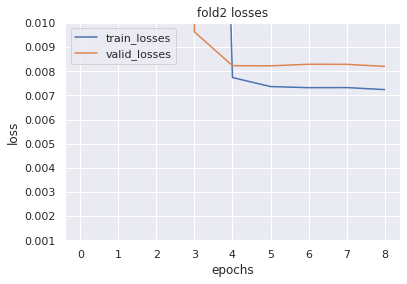

scored_loop
-----EPOCH1-----
train_loss: 0.64462, train_metric: 0.64454
valid_loss: 0.44269, valid_metric: 0.44239
-----EPOCH2-----
train_loss: 0.18161, train_metric: 0.18062
valid_loss: 0.04435, valid_metric: 0.04262
-----EPOCH3-----
train_loss: 0.02855, train_metric: 0.02633
valid_loss: 0.02335, valid_metric: 0.02081
-----EPOCH4-----
train_loss: 0.02191, train_metric: 0.01917
valid_loss: 0.02191, valid_metric: 0.01903
-----EPOCH5-----
train_loss: 0.02110, train_metric: 0.01814
valid_loss: 0.02148, valid_metric: 0.01849
-----EPOCH6-----
train_loss: 0.02088, train_metric: 0.01783
valid_loss: 0.02174, valid_metric: 0.01874
-----EPOCH7-----
train_loss: 0.02085, train_metric: 0.01778
valid_loss: 0.02167, valid_metric: 0.01867
-----EPOCH8-----
train_loss: 0.02091, train_metric: 0.01785
valid_loss: 0.02170, valid_metric: 0.01876
-----EPOCH9-----
train_loss: 0.02077, train_metric: 0.01772
valid_loss: 0.02166, valid_metric: 0.01840
-----EPOCH10-----
train_loss: 0.02085, train_metric: 0.01779


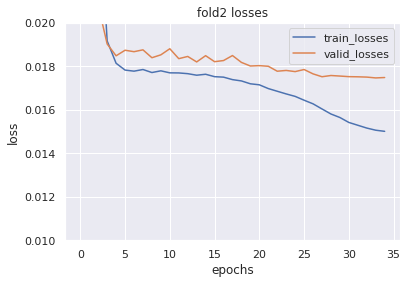

==========FOLD3==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72793, train_metric: 0.72793
valid_loss: 0.70473, valid_metric: 0.70473
-----EPOCH2-----
train_loss: 0.69365, train_metric: 0.69364
valid_loss: 0.69118, valid_metric: 0.69117
-----EPOCH3-----
train_loss: 0.52327, train_metric: 0.52306
valid_loss: 0.24228, valid_metric: 0.24163
-----EPOCH4-----
train_loss: 0.06296, train_metric: 0.06118
valid_loss: 0.01184, valid_metric: 0.00904
-----EPOCH5-----
train_loss: 0.01102, train_metric: 0.00790
valid_loss: 0.01084, valid_metric: 0.00756
-----EPOCH6-----
train_loss: 0.01073, train_metric: 0.00747
valid_loss: 0.01084, valid_metric: 0.00755
-----EPOCH7-----
train_loss: 0.01071, train_metric: 0.00751
valid_loss: 0.01087, valid_metric: 0.00755
-----EPOCH8-----
train_loss: 0.01070, train_metric: 0.00752
valid_loss: 0.01100, valid_metric: 0.00791
-----EPOCH9-----
train_loss: 0.01063, train_metric: 0.00746
valid_loss: 0.01090, valid_metric: 0.00767
early_stopping


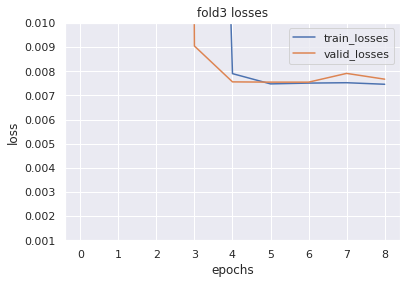

scored_loop
-----EPOCH1-----
train_loss: 0.64733, train_metric: 0.64725
valid_loss: 0.44556, valid_metric: 0.44525
-----EPOCH2-----
train_loss: 0.18140, train_metric: 0.18041
valid_loss: 0.04313, valid_metric: 0.04138
-----EPOCH3-----
train_loss: 0.02868, train_metric: 0.02647
valid_loss: 0.02355, valid_metric: 0.02100
-----EPOCH4-----
train_loss: 0.02198, train_metric: 0.01925
valid_loss: 0.02173, valid_metric: 0.01881
-----EPOCH5-----
train_loss: 0.02103, train_metric: 0.01807
valid_loss: 0.02169, valid_metric: 0.01860
-----EPOCH6-----
train_loss: 0.02089, train_metric: 0.01784
valid_loss: 0.02161, valid_metric: 0.01855
-----EPOCH7-----
train_loss: 0.02079, train_metric: 0.01771
valid_loss: 0.02181, valid_metric: 0.01853
-----EPOCH8-----
train_loss: 0.02089, train_metric: 0.01783
valid_loss: 0.02206, valid_metric: 0.01914
-----EPOCH9-----
train_loss: 0.02087, train_metric: 0.01782
valid_loss: 0.02159, valid_metric: 0.01847
-----EPOCH10-----
train_loss: 0.02100, train_metric: 0.01795


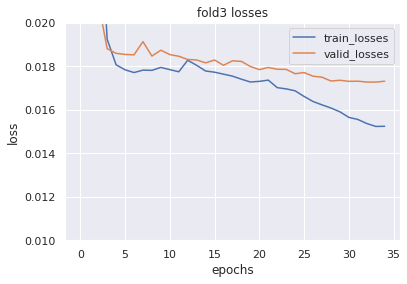

==========FOLD4==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72791, train_metric: 0.72791
valid_loss: 0.70329, valid_metric: 0.70329
-----EPOCH2-----
train_loss: 0.69359, train_metric: 0.69358
valid_loss: 0.68984, valid_metric: 0.68983
-----EPOCH3-----
train_loss: 0.52273, train_metric: 0.52252
valid_loss: 0.23831, valid_metric: 0.23764
-----EPOCH4-----
train_loss: 0.06276, train_metric: 0.06098
valid_loss: 0.01161, valid_metric: 0.00882
-----EPOCH5-----
train_loss: 0.01109, train_metric: 0.00797
valid_loss: 0.01055, valid_metric: 0.00728
-----EPOCH6-----
train_loss: 0.01086, train_metric: 0.00761
valid_loss: 0.01053, valid_metric: 0.00727
-----EPOCH7-----
train_loss: 0.01080, train_metric: 0.00761
valid_loss: 0.01049, valid_metric: 0.00724
-----EPOCH8-----
train_loss: 0.01074, train_metric: 0.00758
valid_loss: 0.01058, valid_metric: 0.00741
-----EPOCH9-----
train_loss: 0.01071, train_metric: 0.00755
valid_loss: 0.01061, valid_metric: 0.00746
-----EPOCH10-----
train_loss: 0.

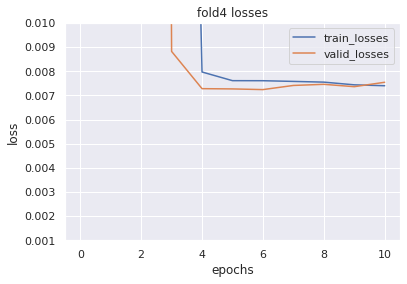

scored_loop
-----EPOCH1-----
train_loss: 0.64990, train_metric: 0.64983
valid_loss: 0.44538, valid_metric: 0.44508
-----EPOCH2-----
train_loss: 0.17850, train_metric: 0.17751
valid_loss: 0.04363, valid_metric: 0.04190
-----EPOCH3-----
train_loss: 0.02894, train_metric: 0.02674
valid_loss: 0.02289, valid_metric: 0.02033
-----EPOCH4-----
train_loss: 0.02202, train_metric: 0.01929
valid_loss: 0.02121, valid_metric: 0.01837
-----EPOCH5-----
train_loss: 0.02114, train_metric: 0.01818
valid_loss: 0.02114, valid_metric: 0.01816
-----EPOCH6-----
train_loss: 0.02092, train_metric: 0.01787
valid_loss: 0.02097, valid_metric: 0.01790
-----EPOCH7-----
train_loss: 0.02087, train_metric: 0.01780
valid_loss: 0.02072, valid_metric: 0.01766
-----EPOCH8-----
train_loss: 0.02083, train_metric: 0.01777
valid_loss: 0.02087, valid_metric: 0.01792
-----EPOCH9-----
train_loss: 0.02082, train_metric: 0.01776
valid_loss: 0.02090, valid_metric: 0.01783
-----EPOCH10-----
train_loss: 0.02085, train_metric: 0.01780


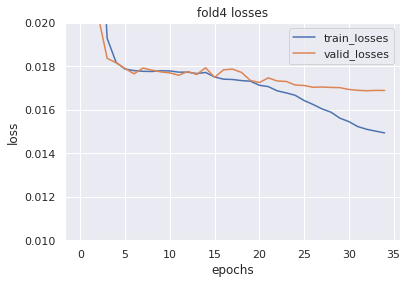

==========FOLD5==========
nonscored-loop
-----EPOCH1-----
train_loss: 0.72796, train_metric: 0.72796
valid_loss: 0.70476, valid_metric: 0.70476
-----EPOCH2-----
train_loss: 0.69361, train_metric: 0.69360
valid_loss: 0.69053, valid_metric: 0.69052
-----EPOCH3-----
train_loss: 0.52302, train_metric: 0.52282
valid_loss: 0.24327, valid_metric: 0.24262
-----EPOCH4-----
train_loss: 0.06281, train_metric: 0.06103
valid_loss: 0.01186, valid_metric: 0.00907
-----EPOCH5-----
train_loss: 0.01105, train_metric: 0.00792
valid_loss: 0.01083, valid_metric: 0.00754
-----EPOCH6-----
train_loss: 0.01076, train_metric: 0.00750
valid_loss: 0.01081, valid_metric: 0.00759
-----EPOCH7-----
train_loss: 0.01074, train_metric: 0.00754
valid_loss: 0.01077, valid_metric: 0.00754
-----EPOCH8-----
train_loss: 0.01066, train_metric: 0.00749
valid_loss: 0.01082, valid_metric: 0.00765
-----EPOCH9-----
train_loss: 0.01065, train_metric: 0.00748
valid_loss: 0.01085, valid_metric: 0.00765
-----EPOCH10-----
train_loss: 0.

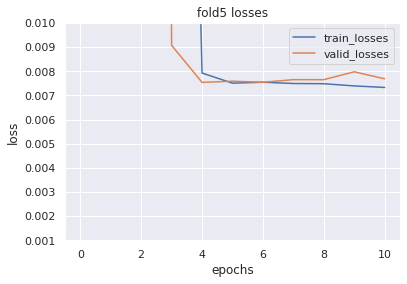

scored_loop
-----EPOCH1-----
train_loss: 0.64362, train_metric: 0.64354
valid_loss: 0.44052, valid_metric: 0.44021
-----EPOCH2-----
train_loss: 0.17848, train_metric: 0.17749
valid_loss: 0.04445, valid_metric: 0.04273
-----EPOCH3-----
train_loss: 0.02904, train_metric: 0.02684
valid_loss: 0.02310, valid_metric: 0.02056
-----EPOCH4-----
train_loss: 0.02200, train_metric: 0.01927
valid_loss: 0.02210, valid_metric: 0.01920
-----EPOCH5-----
train_loss: 0.02113, train_metric: 0.01817
valid_loss: 0.02104, valid_metric: 0.01807
-----EPOCH6-----
train_loss: 0.02088, train_metric: 0.01783
valid_loss: 0.02137, valid_metric: 0.01828
-----EPOCH7-----
train_loss: 0.02085, train_metric: 0.01778
valid_loss: 0.02096, valid_metric: 0.01792
-----EPOCH8-----
train_loss: 0.02083, train_metric: 0.01776
valid_loss: 0.02093, valid_metric: 0.01786
-----EPOCH9-----
train_loss: 0.02082, train_metric: 0.01776
valid_loss: 0.02085, valid_metric: 0.01780
-----EPOCH10-----
train_loss: 0.02084, train_metric: 0.01779


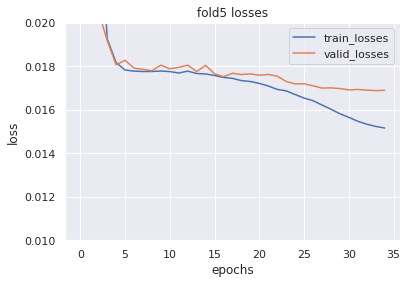

In [41]:
# Averaging on multiple SEEDS

SEED = [0, 1, 2]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))
CVs = list()

print(f'used device: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_, CVs_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    CVs += CVs_
    
train[target_cols] = oof
test[target_cols] = predictions

In [42]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f} +/- {np.std(CVs):.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.015647 +/- 0.000242
AUC: 0.666015


In [43]:
file_path = 'oof_ResNet.npy'
np.save(file_path, y_pred)

submission_ResNet2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [44]:
submission_ResNet = submission_ResNet1 * 0.7 + submission_ResNet2 * 0.3

## Model TabNet

In [45]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 35
BATCH_SIZE = 64
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 5e-6
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False
smoothing = 1e-6
p_min = smoothing
p_max = 1 - smoothing

num_features = len(feature_cols)
num_targets = len(target_cols)
hidden_size_1 = 1024
hidden_size_2 = 1024

In [46]:
MAX_EPOCH = 200
# n_d and n_a are different from the original work, 32 instead of 24
# This is the first change in the code from the original
tabnet_params = dict(
    n_d = 32,
    n_a = 32,
    n_steps = 1,
    gamma = 1.3,
    lambda_sparse = 0,
    optimizer_fn = optim.Adam,
    optimizer_params = dict(lr = 2e-2, weight_decay = 1e-5),
    mask_type = "entmax",
    scheduler_params = dict(
        mode = "min", patience = 5, min_lr = 1e-5, factor = 0.9),
    scheduler_fn = optim.lr_scheduler.ReduceLROnPlateau,
    seed = seed,
    verbose = 1
)

In [47]:
scores_auc_all = []
test_cv_preds = []

# mskf = MultilabelStratifiedKFold(n_splits = NB_SPLITS, random_state = 0, shuffle = True)

oof_preds = []
oof_targets = []
scores = []
scores_auc = []

oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))

SEED = [0, 1, 2]

for seed in SEED:
    
    print(f'SEED: {seed}')
    
    oof_tmp = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
#     predictions_tmp = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    
    for fold in range(NFOLDS):
        print("FOLDS: ", fold + 1)
        print('*' * 60)

    #     X_train, y_train = train_df[feature_cols].values[train_idx, :], target[target_cols].values[train_idx, :]
    #     X_val, y_val = train_df[feature_cols].values[val_idx, :], target[target_cols].values[val_idx, :]
    #     X_test = test_df[feature_cols].values

        train_ = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
        test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])

        trn_idx = train_[train_[f'seed{seed}'] != fold].index
        val_idx = train_[train_[f'seed{seed}'] == fold].index

        train_df = train_[train_[f'seed{seed}'] != fold].reset_index()
        valid_df = train_[train_[f'seed{seed}'] == fold].reset_index()
    
        x_train, y_train = train_df[feature_cols].values, train_df[target_cols].values
        x_valid, y_valid = valid_df[feature_cols].values, valid_df[target_cols].values

        x_test = test_[feature_cols].values

        ### Model ###
        model = TabNetRegressor(**tabnet_params)

        ### Fit ###
        # Another change to the original code
        # virtual_batch_size of 32 instead of 128
        model.fit(
            X_train = x_train,
            y_train = y_train,
            eval_set = [(x_valid, y_valid)],
            eval_name = ["val"],
            eval_metric = ["logits_ll"],
            max_epochs = MAX_EPOCH,
            patience = 20,
            batch_size = 1024, 
            virtual_batch_size = 32,
            num_workers = 1,
            drop_last = False,
#             from_unsupervised=pretrainer,
            # To use binary cross entropy because this is not a regression problem
            loss_fn = SmoothBCEwLogits(smoothing=smoothing)
        )
        print('-' * 60)

        ### Predict on validation ###
        preds_val = model.predict(x_valid)
        # Apply sigmoid to the predictions
        preds = 1 / (1 + np.exp(-preds_val))
        preds = np.clip(preds, p_min, p_max)
        oof_tmp[val_idx] += preds
        score = np.min(model.history["val_logits_ll"])

        ### Save OOF for CV ###
        oof_preds.append(preds)
        oof_targets.append(y_valid)
        scores.append(score)

        ### Predict on test ###
        preds_test = model.predict(x_test)
        preds_test = 1 / (1 + np.exp(-preds_test))
        preds_test = np.clip(preds_test, p_min, p_max)
#         predictions_tmp += preds_test / NFOLDS
        test_cv_preds.append(preds_test)

#         name = f'TabNet_FOLD{fold+1}_SEED{seed}'
#         model.save_model(name)
    
    oof += oof_tmp / len(SEED)

train[target_cols] = oof
test_preds_all = np.stack(test_cv_preds)

SEED: 0
FOLDS:  1
************************************************************
Device used : cuda
epoch 0  | loss: 0.36515 | val_logits_ll: 0.03955 |  0:00:01s
epoch 1  | loss: 0.02928 | val_logits_ll: 0.02751 |  0:00:03s
epoch 2  | loss: 0.02402 | val_logits_ll: 0.02231 |  0:00:05s
epoch 3  | loss: 0.02172 | val_logits_ll: 0.02095 |  0:00:07s
epoch 4  | loss: 0.02104 | val_logits_ll: 0.02042 |  0:00:08s
epoch 5  | loss: 0.02066 | val_logits_ll: 0.02014 |  0:00:10s
epoch 6  | loss: 0.02035 | val_logits_ll: 0.01987 |  0:00:12s
epoch 7  | loss: 0.02    | val_logits_ll: 0.01953 |  0:00:14s
epoch 8  | loss: 0.01976 | val_logits_ll: 0.01936 |  0:00:15s
epoch 9  | loss: 0.01943 | val_logits_ll: 0.01911 |  0:00:17s
epoch 10 | loss: 0.01915 | val_logits_ll: 0.01882 |  0:00:18s
epoch 11 | loss: 0.01886 | val_logits_ll: 0.01864 |  0:00:20s
epoch 12 | loss: 0.01858 | val_logits_ll: 0.01903 |  0:00:22s
epoch 13 | loss: 0.01874 | val_logits_ll: 0.01988 |  0:00:24s
epoch 14 | loss: 0.01851 | val_log

In [48]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.015673
AUC: 0.660284


In [49]:
file_path = 'oof_TabNet.npy'
np.save(file_path, y_pred)

all_feat = [col for col in sample_submission.columns if col not in ["sig_id"]]
# To obtain the same length of test_preds_all and submission
data_path = "../input/lish-moa/"
test = pd.read_csv(data_path + "test_features.csv")
sig_id = test[test["cp_type"] != "ctl_vehicle"].sig_id.reset_index(drop = True)
tmp = pd.DataFrame(test_preds_all.mean(axis = 0), columns = all_feat)
tmp["sig_id"] = sig_id

submission_TabNet2 = pd.merge(test[["sig_id"]], tmp, on = "sig_id", how = "left")
submission_TabNet2.fillna(0, inplace = True)

submission_TabNet2 = submission_TabNet2.iloc[:, 1:]

#submission[all_feat] = tmp.mean(axis = 0)

# Set control to 0
#submission.loc[test["cp_type"] == 0, submission.columns[1:]] = 0
# submission.to_csv("submission.csv", index = None)
# submission.head()

In [50]:
submission_TabNet = submission_TabNet1 * 0.7 + submission_TabNet2 * 0.3

## Model Simple Deep

In [51]:
def preprocessor(train_features, test_features):
    
    print('preprocess start')
    
#     # drop_ctl_vehicle
#     train_features, test_features, target = drop_ctl_vehicle(train_features, test_features)
    
    # rank_gauss
    train_features, test_features = rank_gauss(train_features, test_features)
    print('rank_gauss: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # stats
    train_features, test_features = get_stats(train_features, test_features)
    print('get_stats: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # pca
    train_features, test_features = get_pca(train_features, test_features, n_gs=600, n_cs=50) 
    print('get_pca: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
    # var_thresh
    train_features, test_features = var_thresh(threshold=0.8, train_features=train_features, test_features=test_features)
    print('var_thresh: done')
    print('train_features.shape', train_features.shape)
    print('test_features.shape', test_features.shape)
    
#     # clustering
#     train_features, test_features = get_cluster(train_features, test_features, n_clusters_g=35, n_clusters_c=5, SEED=0)
#     print('clustering: done')
#     print('train_features.shape', train_features.shape)
#     print('test_features.shape', test_features.shape)
    
#     # Scaling
#     train_features, test_features = scaling(train_features, test_features)
#     print('scaling: done')
    
    # data merge
    train = train_features.merge(train_targets_scored, on='sig_id').merge(train_targets_nonscored, on ='sig_id')
    train = train[train['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)
    test = test_features[test_features['cp_type'] != 'ctl_vehicle'].reset_index(drop=True)

    target = train[train_targets_scored.columns]
    target_nonscored = train[train_targets_nonscored.columns]
    
    train = train.drop('cp_type', axis=1)
    test = test.drop('cp_type', axis=1)
    
    return train, target, test, target_nonscored  

train, target, test, target_nonscored = preprocessor(train_features, test_features)

preprocess start
rank_gauss: done
train_features.shape (23814, 876)
test_features.shape (3982, 876)
get_stats: done
train_features.shape (23814, 888)
test_features.shape (3982, 888)
get_pca: done
train_features.shape (23814, 1538)
test_features.shape (3982, 1538)
var_thresh: done
train_features.shape (23814, 1043)
test_features.shape (3982, 1043)


In [52]:
folds = make_folds(train, num_starts=3, num_splits=5)

In [53]:
target_cols = target.drop('sig_id', axis=1).columns.values.tolist()
target_nonscored_cols = target_nonscored.drop('sig_id', axis=1).columns.values.tolist()
feature_cols = [c for c in pd.get_dummies(train, columns=['cp_time', 'cp_dose']).columns if (c not in target_cols) & (c not in target_nonscored_cols)]
feature_cols = [c for c in feature_cols if c not in ['kfold', 'sig_id']]
all_target_cols = target_cols + target_nonscored_cols

num_features = len(feature_cols)
num_targets = len(target_cols)
num_targets_nonscored = len(target_nonscored_cols)
num_all_targets = len(all_target_cols)

print(f'num_features: {num_features}')
print(f'num_targets: {num_targets}')
print(f'num_targets_nonscored: {num_targets_nonscored}')
print(f'num_all_targets: {num_all_targets}')

num_features: 1044
num_targets: 206
num_targets_nonscored: 402
num_all_targets: 608


In [54]:
print(f'train.shape: {train.shape}')
print(f'folds.shape: {folds.shape}')
print(f'test.shape: {test.shape}')
print(f'target.shape: {target.shape}')
print(f'target_nonscored.shape: {target_nonscored.shape}')
print(f'sample_submission.shape: {sample_submission.shape}')

train.shape: (21948, 1650)
folds.shape: (21948, 1653)
test.shape: (3624, 1042)
target.shape: (21948, 207)
target_nonscored.shape: (21948, 403)
sample_submission.shape: (3982, 207)


In [55]:
def train_fn(model, optimizer, scheduler, loss_tr, loss_fn, dataloader, device):
    rejected = 0
    model.train()
    final_loss = 0
    final_metric = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
        if len(inputs) > 1:
            outputs = model(inputs)
            loss = loss_tr(outputs, targets)
            metric = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

            final_loss += loss.item()
            final_metric += metric.item()
        
        else:
            print('rejected')
            rejected += len(inputs)
            
        
    final_loss /= (len(dataloader) - rejected)
    final_metric /= (len(dataloader) - rejected)
    
    return final_loss, final_metric

In [56]:
def valid_fn(model, loss_tr, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    final_metric = 0
    valid_preds = []
    
    for data in dataloader:
        
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_tr(outputs, targets)
        metric = loss_fn(outputs, targets)
        final_loss += loss.item()
        final_metric += metric.item()
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)
        valid_preds.append(outputs.numpy())
        
    final_loss /= len(dataloader)
    final_metric /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
        
    return final_loss, final_metric, valid_preds

In [57]:
def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)
        
        with torch.no_grad():
            outputs = model(inputs)
            
        outputs = torch.clamp(torch.sigmoid(outputs).detach().cpu(), p_min, p_max)    
        preds.append(outputs.numpy())
        
    preds = np.concatenate(preds)
        
    return preds

In [58]:
DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 24
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
NFOLDS = 5

smoothing = 0.001
p_min = smoothing
p_max = 1 - smoothing

WEIGHT_DECAY = {'ALL_TARGETS': 1e-5, 'SCORED_ONLY': 3e-6}
MAX_LR = {'ALL_TARGETS': 1e-2, 'SCORED_ONLY': 3e-3}
DIV_FACTOR = {'ALL_TARGETS': 1e3, 'SCORED_ONLY': 1e2}
PCT_START = 0.1

In [59]:
def run_training(fold, seed, EPOCHS, LEARNING_RATE):
    
    print(f'==========FOLD{fold+1}==========')
    
    
    seed_everything(seed)
    
    train_losses = list()
    valid_losses = list()
    CV = list()
    
    train = pd.get_dummies(folds, columns=['cp_time', 'cp_dose'])
    test_ = pd.get_dummies(test, columns=['cp_time', 'cp_dose'])
    
    trn_idx = train[train[f'seed{seed}'] != fold].index
    val_idx = train[train[f'seed{seed}'] == fold].index
    
    train_df = train[train[f'seed{seed}'] != fold].reset_index()
    valid_df = train[train[f'seed{seed}'] == fold].reset_index()
    
    def train_model(model, tag_name, target_cols_now, fine_tune_scheduler=None):
        
        print(f'=={tag_name}==')
        
        train_losses = list()
        valid_losses = list()
        
        x_train, y_train  = train_df[feature_cols].values, train_df[target_cols_now].values
        x_valid, y_valid =  valid_df[feature_cols].values, valid_df[target_cols_now].values
        
        train_dataset = MoADataset(x_train, y_train)
        valid_dataset = MoADataset(x_valid, y_valid)

        trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
        validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY[tag_name])
        scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer,
                                                  steps_per_epoch=len(trainloader),
                                                  pct_start=PCT_START,
                                                  div_factor=DIV_FACTOR[tag_name], 
                                                  max_lr=MAX_LR[tag_name],
                                                  epochs=EPOCHS)
        
        loss_fn = nn.BCEWithLogitsLoss()
        loss_tr = SmoothBCEwLogits(smoothing=smoothing)

        oof = np.zeros((len(train), len(target_cols_now)))
        best_loss = np.inf

        for epoch in range(EPOCHS):
        
            if fine_tune_scheduler is not None:
                fine_tune_scheduler.step(epoch, model)
        
            print(f'-----EPOCH{epoch+1}-----')

            train_loss, train_metric = train_fn(model, optimizer, scheduler, loss_tr, loss_fn, trainloader, DEVICE)
            print(f'train_loss: {train_loss:.5f}, train_metric: {train_metric:.5f}')
            train_losses.append(train_loss)
            valid_loss, valid_metric, valid_preds = valid_fn(model, loss_tr, loss_fn, validloader, DEVICE)
            print(f'valid_loss: {valid_loss:.5f}, valid_metric: {valid_metric:.5f}')
            valid_losses.append(valid_loss)

            if valid_loss < best_loss:

                best_loss = valid_loss
                oof[val_idx] = valid_preds
                torch.save(model.state_dict(), f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth')

        plt.plot(train_losses, label='train_losses')
        plt.plot(valid_losses, label='valid_losses')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        if tag_name == 'ALL_TARGETS':
            plt.ylim([6e-3, 1.5e-2])
        else:
            plt.ylim([1e-2, 2e-2])
        plt.title(f'fold{fold+1} losses')
        plt.show()

        return oof
    
    fine_tune_scheduler = FineTuneScheduler(EPOCHS)
    
    pretrained_model = Model_Simple_Deep(num_features, num_all_targets)
    pretrained_model.to(DEVICE)
    
    # Train on scored + nonscored targets
    train_model(pretrained_model, 'ALL_TARGETS', all_target_cols)
    
    # Load the pretrained model with the best loss
    pretrained_model = Model_Simple_Deep(num_features, num_all_targets)
    pretrained_model.load_state_dict(torch.load(f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth'))
    pretrained_model.to(DEVICE)
    
    # Copy model without the top layer)
    final_model = fine_tune_scheduler.copy_without_top(pretrained_model, num_features, num_all_targets, num_targets)
    
    # Fine-ture the model on scored targets only
    oof = train_model(final_model, 'SCORED_ONLY', target_cols, fine_tune_scheduler)
    
    #-----------------------PREDICTION-------------------------
                
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Load the fine tuned model with the best loss
    model = Model_Simple_Deep(num_features, num_targets)
    model.load_state_dict(torch.load(f'Simple_Deep_FOLD{fold+1}_SEED{seed}.pth'))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions

In [60]:
def run_k_fold(NFOLD, seed, EPOCH, LEARNING_RATE):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    
    for fold in range(NFOLDS):
        oof_, pred_ = run_training(fold, seed, EPOCH, LEARNING_RATE)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        
    return oof, predictions

device used: cuda
 
SEED : 0

==========FOLD1==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50707, train_metric: 0.50663
valid_loss: 0.02482, valid_metric: 0.02267
-----EPOCH2-----
train_loss: 0.01610, train_metric: 0.01324
valid_loss: 0.01410, valid_metric: 0.01096
-----EPOCH3-----
train_loss: 0.01331, train_metric: 0.01004
valid_loss: 0.01324, valid_metric: 0.01000
-----EPOCH4-----
train_loss: 0.01300, train_metric: 0.00969
valid_loss: 0.01582, valid_metric: 0.01250
-----EPOCH5-----
train_loss: 0.01287, train_metric: 0.00955
valid_loss: 0.01309, valid_metric: 0.00981
-----EPOCH6-----
train_loss: 0.01277, train_metric: 0.00948
valid_loss: 0.01351, valid_metric: 0.01022
-----EPOCH7-----
train_loss: 0.01293, train_metric: 0.00965
valid_loss: 0.01315, valid_metric: 0.00986
-----EPOCH8-----
train_loss: 0.01276, train_metric: 0.00948
valid_loss: 0.01324, valid_metric: 0.00995
-----EPOCH9-----
train_loss: 0.01277, train_metric: 0.00951
valid_loss: 0.01306, valid_metric: 0.00981
-

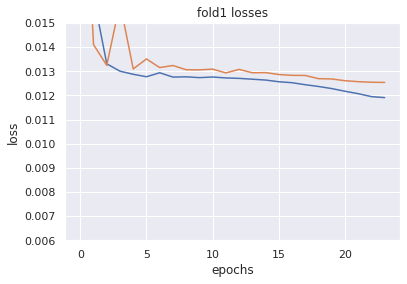

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65509, train_metric: 0.65502
valid_loss: 0.30403, valid_metric: 0.30350
-----EPOCH2-----
train_loss: 0.06633, train_metric: 0.06455
valid_loss: 0.02272, valid_metric: 0.02027
-----EPOCH3-----
train_loss: 0.02115, train_metric: 0.01844
valid_loss: 0.02053, valid_metric: 0.01767
-----EPOCH4-----
train_loss: 0.01994, train_metric: 0.01696
valid_loss: 0.02035, valid_metric: 0.01732
-----EPOCH5-----
train_loss: 0.02234, train_metric: 0.01918
valid_loss: 0.02026, valid_metric: 0.01697
-----EPOCH6-----
train_loss: 0.01964, train_metric: 0.01643
valid_loss: 0.02024, valid_metric: 0.01699
-----EPOCH7-----
train_loss: 0.01951, train_metric: 0.01629
valid_loss: 0.02020, valid_metric: 0.01688
-----EPOCH8-----
train_loss: 0.01938, train_metric: 0.01614
valid_loss: 0.02022, valid_metric: 0.01690
-----EPOCH9-----
train_loss: 0.01960, train_metric: 0.01636
valid_loss: 0.02024, valid_metric: 0.01694
-----EPOCH10-----
train_loss: 0.01940, train_metric: 0.01

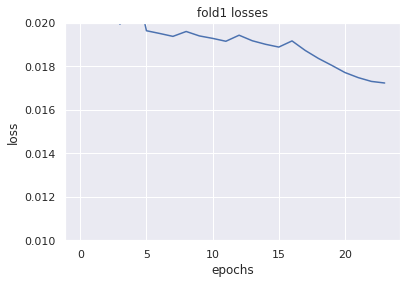

==========FOLD2==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51057, train_metric: 0.51015
valid_loss: 0.02478, valid_metric: 0.02246
-----EPOCH2-----
train_loss: 0.01586, train_metric: 0.01303
valid_loss: 0.01379, valid_metric: 0.01069
-----EPOCH3-----
train_loss: 0.01355, train_metric: 0.01031
valid_loss: 0.01328, valid_metric: 0.01011
-----EPOCH4-----
train_loss: 0.01294, train_metric: 0.00964
valid_loss: 0.01312, valid_metric: 0.00986
-----EPOCH5-----
train_loss: 0.01279, train_metric: 0.00948
valid_loss: 0.01313, valid_metric: 0.00988
-----EPOCH6-----
train_loss: 0.01279, train_metric: 0.00950
valid_loss: 0.01316, valid_metric: 0.00990
-----EPOCH7-----
train_loss: 0.01279, train_metric: 0.00950
valid_loss: 0.01298, valid_metric: 0.00970
-----EPOCH8-----
train_loss: 0.01273, train_metric: 0.00947
valid_loss: 0.01303, valid_metric: 0.00979
-----EPOCH9-----
train_loss: 0.01271, train_metric: 0.00946
valid_loss: 0.01306, valid_metric: 0.00976
-----EPOCH10-----
train_loss: 0

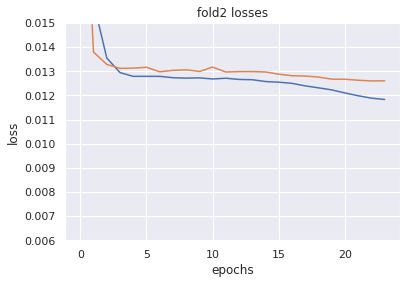

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65353, train_metric: 0.65346
valid_loss: 0.31082, valid_metric: 0.31031
-----EPOCH2-----
train_loss: 0.06733, train_metric: 0.06556
valid_loss: 0.02322, valid_metric: 0.02076
-----EPOCH3-----
train_loss: 0.02086, train_metric: 0.01815
valid_loss: 0.02113, valid_metric: 0.01825
-----EPOCH4-----
train_loss: 0.01968, train_metric: 0.01670
valid_loss: 0.02103, valid_metric: 0.01799
-----EPOCH5-----
train_loss: 0.02133, train_metric: 0.01815
valid_loss: 0.02114, valid_metric: 0.01785
-----EPOCH6-----
train_loss: 0.01945, train_metric: 0.01623
valid_loss: 0.02099, valid_metric: 0.01773
-----EPOCH7-----
train_loss: 0.01931, train_metric: 0.01608
valid_loss: 0.02107, valid_metric: 0.01796
-----EPOCH8-----
train_loss: 0.01922, train_metric: 0.01598
valid_loss: 0.02100, valid_metric: 0.01782
-----EPOCH9-----
train_loss: 0.01981, train_metric: 0.01656
valid_loss: 0.02118, valid_metric: 0.01784
-----EPOCH10-----
train_loss: 0.01934, train_metric: 0.01

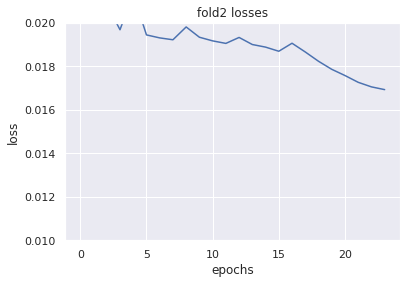

==========FOLD3==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51010, train_metric: 0.50967
valid_loss: 0.02561, valid_metric: 0.02340
-----EPOCH2-----
train_loss: 0.01618, train_metric: 0.01332
valid_loss: 0.01343, valid_metric: 0.01027
-----EPOCH3-----
train_loss: 0.01351, train_metric: 0.01025
valid_loss: 0.01368, valid_metric: 0.01038
-----EPOCH4-----
train_loss: 0.01305, train_metric: 0.00973
valid_loss: 0.01392, valid_metric: 0.01064
-----EPOCH5-----
train_loss: 0.01300, train_metric: 0.00969
valid_loss: 0.01438, valid_metric: 0.01101
-----EPOCH6-----
train_loss: 0.01304, train_metric: 0.00973
valid_loss: 0.01267, valid_metric: 0.00939
-----EPOCH7-----
train_loss: 0.01301, train_metric: 0.00974
valid_loss: 0.01316, valid_metric: 0.00985
-----EPOCH8-----
train_loss: 0.01290, train_metric: 0.00963
valid_loss: 0.01265, valid_metric: 0.00938
-----EPOCH9-----
train_loss: 0.01290, train_metric: 0.00965
valid_loss: 0.01267, valid_metric: 0.00939
-----EPOCH10-----
train_loss: 0

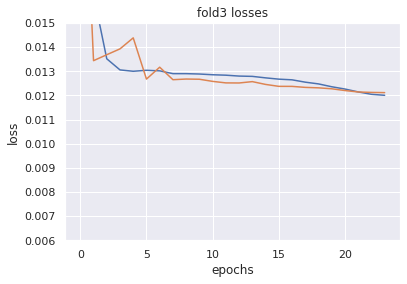

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65401, train_metric: 0.65394
valid_loss: 0.30274, valid_metric: 0.30221
-----EPOCH2-----
train_loss: 0.06656, train_metric: 0.06477
valid_loss: 0.02277, valid_metric: 0.02031
-----EPOCH3-----
train_loss: 0.02112, train_metric: 0.01840
valid_loss: 0.02069, valid_metric: 0.01782
-----EPOCH4-----
train_loss: 0.01995, train_metric: 0.01697
valid_loss: 0.02044, valid_metric: 0.01741
-----EPOCH5-----
train_loss: 0.02185, train_metric: 0.01865
valid_loss: 0.02056, valid_metric: 0.01722
-----EPOCH6-----
train_loss: 0.01974, train_metric: 0.01650
valid_loss: 0.02052, valid_metric: 0.01720
-----EPOCH7-----
train_loss: 0.01959, train_metric: 0.01635
valid_loss: 0.02045, valid_metric: 0.01716
-----EPOCH8-----
train_loss: 0.01945, train_metric: 0.01621
valid_loss: 0.02044, valid_metric: 0.01715
-----EPOCH9-----
train_loss: 0.02006, train_metric: 0.01680
valid_loss: 0.02066, valid_metric: 0.01726
-----EPOCH10-----
train_loss: 0.01950, train_metric: 0.01

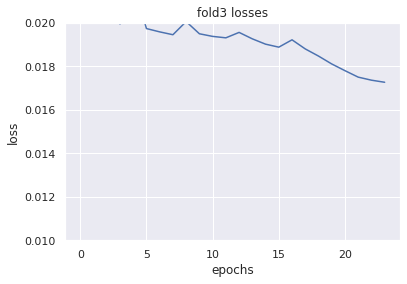

==========FOLD4==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50987, train_metric: 0.50944
valid_loss: 0.03381, valid_metric: 0.03179
-----EPOCH2-----
train_loss: 0.01587, train_metric: 0.01304
valid_loss: 0.01336, valid_metric: 0.01023
-----EPOCH3-----
train_loss: 0.01338, train_metric: 0.01016
valid_loss: 0.01285, valid_metric: 0.00955
-----EPOCH4-----
train_loss: 0.01364, train_metric: 0.01028
valid_loss: 0.01304, valid_metric: 0.00950
-----EPOCH5-----
train_loss: 0.01307, train_metric: 0.00969
valid_loss: 0.01278, valid_metric: 0.00948
-----EPOCH6-----
train_loss: 0.01293, train_metric: 0.00963
valid_loss: 0.01284, valid_metric: 0.00959
-----EPOCH7-----
train_loss: 0.01286, train_metric: 0.00959
valid_loss: 0.01275, valid_metric: 0.00953
-----EPOCH8-----
train_loss: 0.01286, train_metric: 0.00961
valid_loss: 0.01280, valid_metric: 0.00955
-----EPOCH9-----
train_loss: 0.01285, train_metric: 0.00960
valid_loss: 0.01279, valid_metric: 0.00950
-----EPOCH10-----
train_loss: 0

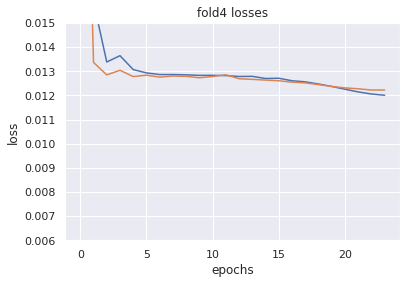

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65225, train_metric: 0.65218
valid_loss: 0.30444, valid_metric: 0.30392
-----EPOCH2-----
train_loss: 0.06666, train_metric: 0.06488
valid_loss: 0.02287, valid_metric: 0.02041
-----EPOCH3-----
train_loss: 0.02113, train_metric: 0.01841
valid_loss: 0.02076, valid_metric: 0.01789
-----EPOCH4-----
train_loss: 0.01995, train_metric: 0.01698
valid_loss: 0.02056, valid_metric: 0.01753
-----EPOCH5-----
train_loss: 0.02310, train_metric: 0.01998
valid_loss: 0.02065, valid_metric: 0.01731
-----EPOCH6-----
train_loss: 0.01972, train_metric: 0.01652
valid_loss: 0.02058, valid_metric: 0.01737
-----EPOCH7-----
train_loss: 0.01960, train_metric: 0.01637
valid_loss: 0.02064, valid_metric: 0.01741
-----EPOCH8-----
train_loss: 0.01944, train_metric: 0.01620
valid_loss: 0.02043, valid_metric: 0.01728
-----EPOCH9-----
train_loss: 0.01977, train_metric: 0.01653
valid_loss: 0.02050, valid_metric: 0.01728
-----EPOCH10-----
train_loss: 0.01947, train_metric: 0.01

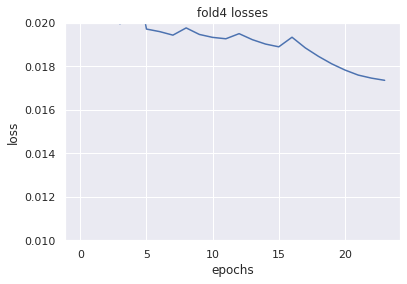

==========FOLD5==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50933, train_metric: 0.50890
valid_loss: 0.03529, valid_metric: 0.03331
-----EPOCH2-----
train_loss: 0.01644, train_metric: 0.01358
valid_loss: 0.01409, valid_metric: 0.01088
-----EPOCH3-----
train_loss: 0.01358, train_metric: 0.01031
valid_loss: 0.01394, valid_metric: 0.01066
-----EPOCH4-----
train_loss: 0.01305, train_metric: 0.00975
valid_loss: 0.01338, valid_metric: 0.01009
-----EPOCH5-----
train_loss: 0.01292, train_metric: 0.00958
valid_loss: 0.01312, valid_metric: 0.00984
-----EPOCH6-----
train_loss: 0.01303, train_metric: 0.00973
valid_loss: 0.01732, valid_metric: 0.01354
-----EPOCH7-----
train_loss: 0.01348, train_metric: 0.01015
valid_loss: 0.01360, valid_metric: 0.01031
-----EPOCH8-----
train_loss: 0.01298, train_metric: 0.00971
valid_loss: 0.01317, valid_metric: 0.00982
-----EPOCH9-----
train_loss: 0.01291, train_metric: 0.00966
valid_loss: 0.01322, valid_metric: 0.00995
-----EPOCH10-----
train_loss: 0

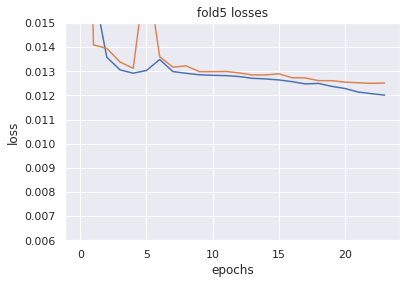

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65630, train_metric: 0.65623
valid_loss: 0.30464, valid_metric: 0.30411
-----EPOCH2-----
train_loss: 0.06721, train_metric: 0.06543
valid_loss: 0.02319, valid_metric: 0.02075
-----EPOCH3-----
train_loss: 0.02129, train_metric: 0.01857
valid_loss: 0.02086, valid_metric: 0.01799
-----EPOCH4-----
train_loss: 0.02020, train_metric: 0.01722
valid_loss: 0.02074, valid_metric: 0.01769
-----EPOCH5-----
train_loss: 0.02397, train_metric: 0.02080
valid_loss: 0.02072, valid_metric: 0.01746
-----EPOCH6-----
train_loss: 0.01980, train_metric: 0.01657
valid_loss: 0.02055, valid_metric: 0.01734
-----EPOCH7-----
train_loss: 0.01969, train_metric: 0.01646
valid_loss: 0.02072, valid_metric: 0.01751
-----EPOCH8-----
train_loss: 0.01967, train_metric: 0.01642
valid_loss: 0.02076, valid_metric: 0.01747
-----EPOCH9-----
train_loss: 0.01995, train_metric: 0.01670
valid_loss: 0.02075, valid_metric: 0.01744
-----EPOCH10-----
train_loss: 0.01972, train_metric: 0.01

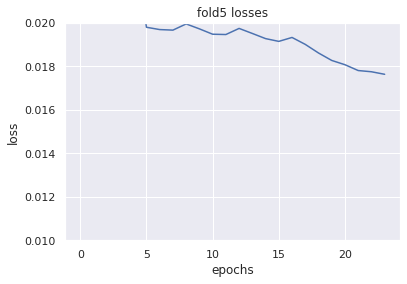

 
SEED : 1

==========FOLD1==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50782, train_metric: 0.50738
valid_loss: 0.02744, valid_metric: 0.02496
-----EPOCH2-----
train_loss: 0.01590, train_metric: 0.01305
valid_loss: 0.01374, valid_metric: 0.01060
-----EPOCH3-----
train_loss: 0.01431, train_metric: 0.01101
valid_loss: 0.01364, valid_metric: 0.01003
-----EPOCH4-----
train_loss: 0.01306, train_metric: 0.00957
valid_loss: 0.01358, valid_metric: 0.01028
-----EPOCH5-----
train_loss: 0.01280, train_metric: 0.00947
valid_loss: 0.01312, valid_metric: 0.00987
-----EPOCH6-----
train_loss: 0.01276, train_metric: 0.00946
valid_loss: 0.01308, valid_metric: 0.00975
-----EPOCH7-----
train_loss: 0.01275, train_metric: 0.00948
valid_loss: 0.01314, valid_metric: 0.00990
-----EPOCH8-----
train_loss: 0.01276, train_metric: 0.00950
valid_loss: 0.01297, valid_metric: 0.00968
-----EPOCH9-----
train_loss: 0.01272, train_metric: 0.00946
valid_loss: 0.01303, valid_metric: 0.00978
-----EPOCH10-----
t

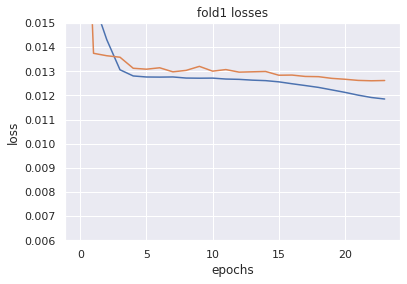

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65495, train_metric: 0.65488
valid_loss: 0.30812, valid_metric: 0.30760
-----EPOCH2-----
train_loss: 0.06707, train_metric: 0.06529
valid_loss: 0.02299, valid_metric: 0.02055
-----EPOCH3-----
train_loss: 0.02100, train_metric: 0.01829
valid_loss: 0.02085, valid_metric: 0.01799
-----EPOCH4-----
train_loss: 0.01985, train_metric: 0.01688
valid_loss: 0.02063, valid_metric: 0.01760
-----EPOCH5-----
train_loss: 0.02162, train_metric: 0.01843
valid_loss: 0.02074, valid_metric: 0.01739
-----EPOCH6-----
train_loss: 0.01954, train_metric: 0.01631
valid_loss: 0.02069, valid_metric: 0.01743
-----EPOCH7-----
train_loss: 0.01940, train_metric: 0.01617
valid_loss: 0.02064, valid_metric: 0.01732
-----EPOCH8-----
train_loss: 0.01930, train_metric: 0.01605
valid_loss: 0.02054, valid_metric: 0.01728
-----EPOCH9-----
train_loss: 0.01955, train_metric: 0.01630
valid_loss: 0.02058, valid_metric: 0.01736
-----EPOCH10-----
train_loss: 0.01932, train_metric: 0.01

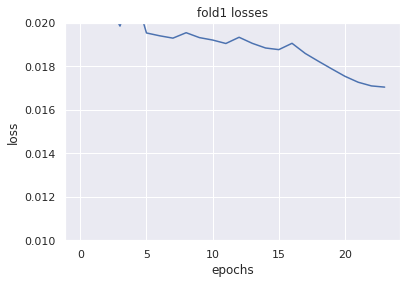

==========FOLD2==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50706, train_metric: 0.50663
valid_loss: 0.02355, valid_metric: 0.02142
-----EPOCH2-----
train_loss: 0.01577, train_metric: 0.01295
valid_loss: 0.01355, valid_metric: 0.01042
-----EPOCH3-----
train_loss: 0.01331, train_metric: 0.01009
valid_loss: 0.01285, valid_metric: 0.00964
-----EPOCH4-----
train_loss: 0.01341, train_metric: 0.01004
valid_loss: 0.01536, valid_metric: 0.01206
-----EPOCH5-----
train_loss: 0.01296, train_metric: 0.00966
valid_loss: 0.01270, valid_metric: 0.00942
-----EPOCH6-----
train_loss: 0.01285, train_metric: 0.00956
valid_loss: 0.01261, valid_metric: 0.00932
-----EPOCH7-----
train_loss: 0.01292, train_metric: 0.00965
valid_loss: 0.01276, valid_metric: 0.00950
-----EPOCH8-----
train_loss: 0.01281, train_metric: 0.00956
valid_loss: 0.01263, valid_metric: 0.00937
-----EPOCH9-----
train_loss: 0.01282, train_metric: 0.00958
valid_loss: 0.01263, valid_metric: 0.00940
-----EPOCH10-----
train_loss: 0

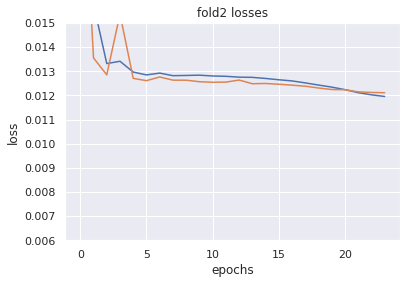

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65384, train_metric: 0.65377
valid_loss: 0.30580, valid_metric: 0.30527
-----EPOCH2-----
train_loss: 0.06709, train_metric: 0.06531
valid_loss: 0.02283, valid_metric: 0.02037
-----EPOCH3-----
train_loss: 0.02102, train_metric: 0.01831
valid_loss: 0.02059, valid_metric: 0.01771
-----EPOCH4-----
train_loss: 0.01981, train_metric: 0.01684
valid_loss: 0.02057, valid_metric: 0.01754
-----EPOCH5-----
train_loss: 0.02249, train_metric: 0.01932
valid_loss: 0.02049, valid_metric: 0.01722
-----EPOCH6-----
train_loss: 0.01959, train_metric: 0.01637
valid_loss: 0.02041, valid_metric: 0.01713
-----EPOCH7-----
train_loss: 0.01946, train_metric: 0.01623
valid_loss: 0.02048, valid_metric: 0.01729
-----EPOCH8-----
train_loss: 0.01932, train_metric: 0.01608
valid_loss: 0.02042, valid_metric: 0.01715
-----EPOCH9-----
train_loss: 0.01963, train_metric: 0.01637
valid_loss: 0.02049, valid_metric: 0.01715
-----EPOCH10-----
train_loss: 0.01933, train_metric: 0.01

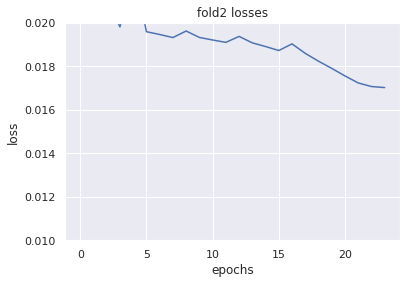

==========FOLD3==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51103, train_metric: 0.51061
valid_loss: 0.05192, valid_metric: 0.04986
-----EPOCH2-----
train_loss: 0.01614, train_metric: 0.01331
valid_loss: 0.01378, valid_metric: 0.01058
-----EPOCH3-----
train_loss: 0.01334, train_metric: 0.01006
valid_loss: 0.01327, valid_metric: 0.01005
-----EPOCH4-----
train_loss: 0.01309, train_metric: 0.00979
valid_loss: 0.01321, valid_metric: 0.00990
-----EPOCH5-----
train_loss: 0.01286, train_metric: 0.00952
valid_loss: 0.01308, valid_metric: 0.00977
-----EPOCH6-----
train_loss: 0.01280, train_metric: 0.00951
valid_loss: 0.01320, valid_metric: 0.00994
-----EPOCH7-----
train_loss: 0.01301, train_metric: 0.00969
valid_loss: 0.01301, valid_metric: 0.00970
-----EPOCH8-----
train_loss: 0.01276, train_metric: 0.00948
valid_loss: 0.01307, valid_metric: 0.00981
-----EPOCH9-----
train_loss: 0.01277, train_metric: 0.00951
valid_loss: 0.01292, valid_metric: 0.00969
-----EPOCH10-----
train_loss: 0

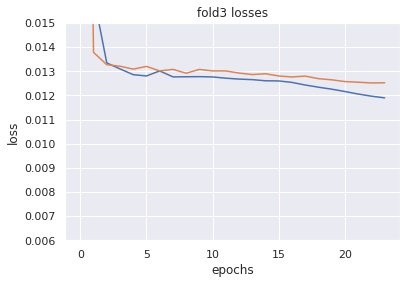

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65275, train_metric: 0.65267
valid_loss: 0.31292, valid_metric: 0.31240
-----EPOCH2-----
train_loss: 0.06924, train_metric: 0.06747
valid_loss: 0.02313, valid_metric: 0.02068
-----EPOCH3-----
train_loss: 0.02110, train_metric: 0.01839
valid_loss: 0.02098, valid_metric: 0.01810
-----EPOCH4-----
train_loss: 0.01988, train_metric: 0.01689
valid_loss: 0.02085, valid_metric: 0.01781
-----EPOCH5-----
train_loss: 0.02502, train_metric: 0.02190
valid_loss: 0.02075, valid_metric: 0.01752
-----EPOCH6-----
train_loss: 0.01960, train_metric: 0.01640
valid_loss: 0.02068, valid_metric: 0.01748
-----EPOCH7-----
train_loss: 0.01943, train_metric: 0.01620
valid_loss: 0.02067, valid_metric: 0.01738
-----EPOCH8-----
train_loss: 0.01932, train_metric: 0.01608
valid_loss: 0.02066, valid_metric: 0.01736
-----EPOCH9-----
train_loss: 0.01958, train_metric: 0.01633
valid_loss: 0.02074, valid_metric: 0.01749
-----EPOCH10-----
train_loss: 0.01940, train_metric: 0.01

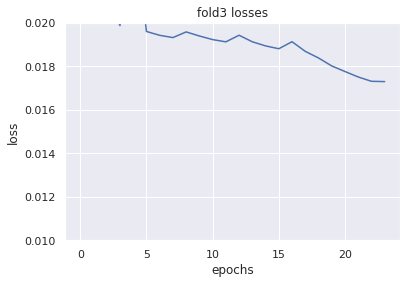

==========FOLD4==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50975, train_metric: 0.50933
valid_loss: 0.02539, valid_metric: 0.02321
-----EPOCH2-----
train_loss: 0.01581, train_metric: 0.01298
valid_loss: 0.01346, valid_metric: 0.01040
-----EPOCH3-----
train_loss: 0.01351, train_metric: 0.01027
valid_loss: 0.01306, valid_metric: 0.00979
-----EPOCH4-----
train_loss: 0.01322, train_metric: 0.00988
valid_loss: 0.01274, valid_metric: 0.00939
-----EPOCH5-----
train_loss: 0.01288, train_metric: 0.00955
valid_loss: 0.01295, valid_metric: 0.00966
-----EPOCH6-----
train_loss: 0.01290, train_metric: 0.00961
valid_loss: 0.01276, valid_metric: 0.00951
-----EPOCH7-----
train_loss: 0.01291, train_metric: 0.00965
valid_loss: 0.01264, valid_metric: 0.00935
-----EPOCH8-----
train_loss: 0.01286, train_metric: 0.00961
valid_loss: 0.01288, valid_metric: 0.00959
-----EPOCH9-----
train_loss: 0.01283, train_metric: 0.00958
valid_loss: 0.01279, valid_metric: 0.00952
-----EPOCH10-----
train_loss: 0

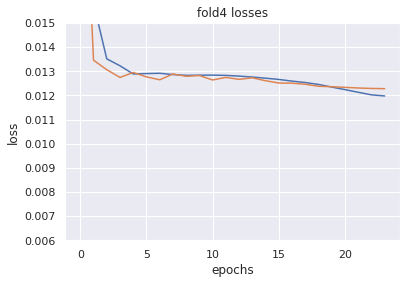

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.64783, train_metric: 0.64775
valid_loss: 0.30412, valid_metric: 0.30360
-----EPOCH2-----
train_loss: 0.06726, train_metric: 0.06548
valid_loss: 0.02312, valid_metric: 0.02066
-----EPOCH3-----
train_loss: 0.02108, train_metric: 0.01836
valid_loss: 0.02107, valid_metric: 0.01819
-----EPOCH4-----
train_loss: 0.02000, train_metric: 0.01702
valid_loss: 0.02079, valid_metric: 0.01775
-----EPOCH5-----
train_loss: 0.02566, train_metric: 0.02256
valid_loss: 0.02083, valid_metric: 0.01760
-----EPOCH6-----
train_loss: 0.01963, train_metric: 0.01643
valid_loss: 0.02080, valid_metric: 0.01757
-----EPOCH7-----
train_loss: 0.01952, train_metric: 0.01630
valid_loss: 0.02081, valid_metric: 0.01756
-----EPOCH8-----
train_loss: 0.01943, train_metric: 0.01620
valid_loss: 0.02074, valid_metric: 0.01758
-----EPOCH9-----
train_loss: 0.01971, train_metric: 0.01646
valid_loss: 0.02092, valid_metric: 0.01770
-----EPOCH10-----
train_loss: 0.01946, train_metric: 0.01

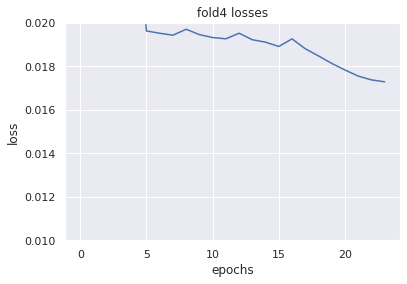

==========FOLD5==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50764, train_metric: 0.50721
valid_loss: 0.02363, valid_metric: 0.02145
-----EPOCH2-----
train_loss: 0.01597, train_metric: 0.01314
valid_loss: 0.01367, valid_metric: 0.01059
-----EPOCH3-----
train_loss: 0.01340, train_metric: 0.01017
valid_loss: 0.01363, valid_metric: 0.01036
-----EPOCH4-----
train_loss: 0.01303, train_metric: 0.00975
valid_loss: 0.01294, valid_metric: 0.00968
-----EPOCH5-----
train_loss: 0.01291, train_metric: 0.00960
valid_loss: 0.01294, valid_metric: 0.00961
-----EPOCH6-----
train_loss: 0.01283, train_metric: 0.00953
valid_loss: 0.01362, valid_metric: 0.01033
-----EPOCH7-----
train_loss: 0.01284, train_metric: 0.00957
valid_loss: 0.01352, valid_metric: 0.01029
-----EPOCH8-----
train_loss: 0.01282, train_metric: 0.00956
valid_loss: 0.01320, valid_metric: 0.00995
-----EPOCH9-----
train_loss: 0.01281, train_metric: 0.00956
valid_loss: 0.01307, valid_metric: 0.00984
-----EPOCH10-----
train_loss: 0

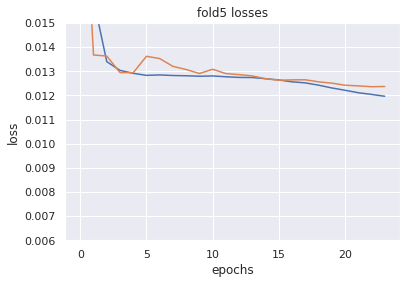

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.64765, train_metric: 0.64757
valid_loss: 0.30403, valid_metric: 0.30350
-----EPOCH2-----
train_loss: 0.06668, train_metric: 0.06491
valid_loss: 0.02279, valid_metric: 0.02034
-----EPOCH3-----
train_loss: 0.02113, train_metric: 0.01842
valid_loss: 0.02058, valid_metric: 0.01771
-----EPOCH4-----
train_loss: 0.02005, train_metric: 0.01707
valid_loss: 0.02044, valid_metric: 0.01742
-----EPOCH5-----
train_loss: 0.02140, train_metric: 0.01825
valid_loss: 0.02046, valid_metric: 0.01720
-----EPOCH6-----
train_loss: 0.01980, train_metric: 0.01659
valid_loss: 0.02036, valid_metric: 0.01715
-----EPOCH7-----
train_loss: 0.01962, train_metric: 0.01640
valid_loss: 0.02034, valid_metric: 0.01702
-----EPOCH8-----
train_loss: 0.01949, train_metric: 0.01626
valid_loss: 0.02046, valid_metric: 0.01729
-----EPOCH9-----
train_loss: 0.01973, train_metric: 0.01649
valid_loss: 0.02039, valid_metric: 0.01715
-----EPOCH10-----
train_loss: 0.01949, train_metric: 0.01

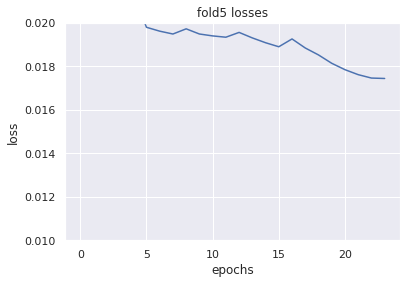

 
SEED : 2

==========FOLD1==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51004, train_metric: 0.50962
valid_loss: 0.02319, valid_metric: 0.02103
-----EPOCH2-----
train_loss: 0.01622, train_metric: 0.01335
valid_loss: 0.01354, valid_metric: 0.01037
-----EPOCH3-----
train_loss: 0.01344, train_metric: 0.01018
valid_loss: 0.01304, valid_metric: 0.00978
-----EPOCH4-----
train_loss: 0.01303, train_metric: 0.00973
valid_loss: 0.01312, valid_metric: 0.00980
-----EPOCH5-----
train_loss: 0.01290, train_metric: 0.00956
valid_loss: 0.01306, valid_metric: 0.00976
-----EPOCH6-----
train_loss: 0.01299, train_metric: 0.00968
valid_loss: 0.01297, valid_metric: 0.00968
-----EPOCH7-----
train_loss: 0.01290, train_metric: 0.00962
valid_loss: 0.01302, valid_metric: 0.00976
-----EPOCH8-----
train_loss: 0.01286, train_metric: 0.00959
valid_loss: 0.01298, valid_metric: 0.00971
-----EPOCH9-----
train_loss: 0.01284, train_metric: 0.00959
valid_loss: 0.01291, valid_metric: 0.00968
-----EPOCH10-----
t

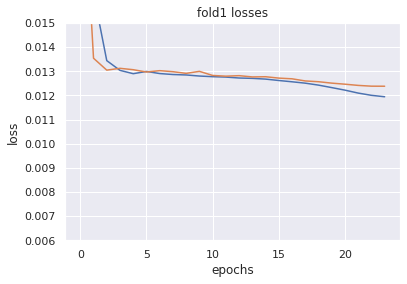

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65475, train_metric: 0.65468
valid_loss: 0.31126, valid_metric: 0.31074
-----EPOCH2-----
train_loss: 0.06801, train_metric: 0.06624
valid_loss: 0.02282, valid_metric: 0.02037
-----EPOCH3-----
train_loss: 0.02113, train_metric: 0.01842
valid_loss: 0.02066, valid_metric: 0.01780
-----EPOCH4-----
train_loss: 0.01994, train_metric: 0.01696
valid_loss: 0.02037, valid_metric: 0.01734
-----EPOCH5-----
train_loss: 0.02320, train_metric: 0.02006
valid_loss: 0.02061, valid_metric: 0.01732
-----EPOCH6-----
train_loss: 0.01969, train_metric: 0.01649
valid_loss: 0.02055, valid_metric: 0.01726
-----EPOCH7-----
train_loss: 0.01952, train_metric: 0.01629
valid_loss: 0.02049, valid_metric: 0.01715
-----EPOCH8-----
train_loss: 0.01952, train_metric: 0.01627
valid_loss: 0.02048, valid_metric: 0.01716
-----EPOCH9-----
train_loss: 0.01965, train_metric: 0.01639
valid_loss: 0.02039, valid_metric: 0.01714
-----EPOCH10-----
train_loss: 0.01945, train_metric: 0.01

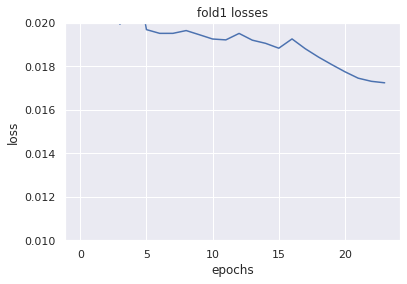

==========FOLD2==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50926, train_metric: 0.50883
valid_loss: 0.02614, valid_metric: 0.02364
-----EPOCH2-----
train_loss: 0.01600, train_metric: 0.01314
valid_loss: 0.01394, valid_metric: 0.01082
-----EPOCH3-----
train_loss: 0.01335, train_metric: 0.01010
valid_loss: 0.01326, valid_metric: 0.01004
-----EPOCH4-----
train_loss: 0.01311, train_metric: 0.00982
valid_loss: 0.01469, valid_metric: 0.01080
-----EPOCH5-----
train_loss: 0.01290, train_metric: 0.00952
valid_loss: 0.01350, valid_metric: 0.01020
-----EPOCH6-----
train_loss: 0.01277, train_metric: 0.00945
valid_loss: 0.01313, valid_metric: 0.00984
-----EPOCH7-----
train_loss: 0.01276, train_metric: 0.00948
valid_loss: 0.01320, valid_metric: 0.01000
-----EPOCH8-----
train_loss: 0.01270, train_metric: 0.00944
valid_loss: 0.01315, valid_metric: 0.00987
-----EPOCH9-----
train_loss: 0.01274, train_metric: 0.00948
valid_loss: 0.01308, valid_metric: 0.00984
-----EPOCH10-----
train_loss: 0

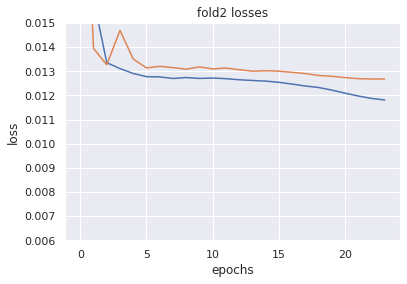

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65301, train_metric: 0.65293
valid_loss: 0.30701, valid_metric: 0.30648
-----EPOCH2-----
train_loss: 0.06710, train_metric: 0.06532
valid_loss: 0.02322, valid_metric: 0.02078
-----EPOCH3-----
train_loss: 0.02091, train_metric: 0.01819
valid_loss: 0.02101, valid_metric: 0.01813
-----EPOCH4-----
train_loss: 0.01972, train_metric: 0.01673
valid_loss: 0.02086, valid_metric: 0.01784
-----EPOCH5-----
train_loss: 0.02176, train_metric: 0.01854
valid_loss: 0.02109, valid_metric: 0.01772
-----EPOCH6-----
train_loss: 0.01955, train_metric: 0.01631
valid_loss: 0.02101, valid_metric: 0.01777
-----EPOCH7-----
train_loss: 0.01932, train_metric: 0.01607
valid_loss: 0.02096, valid_metric: 0.01776
-----EPOCH8-----
train_loss: 0.01920, train_metric: 0.01594
valid_loss: 0.02098, valid_metric: 0.01771
-----EPOCH9-----
train_loss: 0.01954, train_metric: 0.01628
valid_loss: 0.02197, valid_metric: 0.01899
-----EPOCH10-----
train_loss: 0.01930, train_metric: 0.01

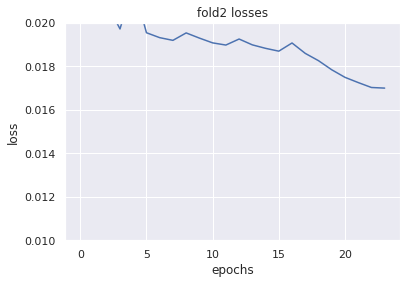

==========FOLD3==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50926, train_metric: 0.50883
valid_loss: 0.02770, valid_metric: 0.02563
-----EPOCH2-----
train_loss: 0.01598, train_metric: 0.01315
valid_loss: 0.01371, valid_metric: 0.01058
-----EPOCH3-----
train_loss: 0.01351, train_metric: 0.01024
valid_loss: 0.01482, valid_metric: 0.01155
-----EPOCH4-----
train_loss: 0.01326, train_metric: 0.00993
valid_loss: 0.01305, valid_metric: 0.00975
-----EPOCH5-----
train_loss: 0.01307, train_metric: 0.00977
valid_loss: 0.01963, valid_metric: 0.01621
-----EPOCH6-----
train_loss: 0.01321, train_metric: 0.00988
valid_loss: 0.01307, valid_metric: 0.00979
-----EPOCH7-----
train_loss: 0.01295, train_metric: 0.00967
valid_loss: 0.01304, valid_metric: 0.00978
-----EPOCH8-----
train_loss: 0.01289, train_metric: 0.00964
valid_loss: 0.01290, valid_metric: 0.00963
-----EPOCH9-----
train_loss: 0.01286, train_metric: 0.00961
valid_loss: 0.01297, valid_metric: 0.00972
-----EPOCH10-----
train_loss: 0

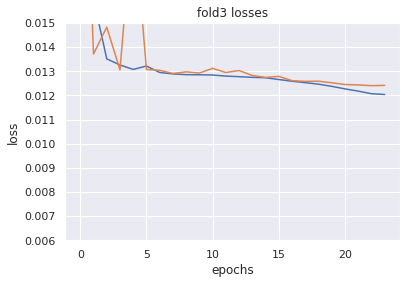

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65609, train_metric: 0.65603
valid_loss: 0.30955, valid_metric: 0.30903
-----EPOCH2-----
train_loss: 0.06790, train_metric: 0.06612
valid_loss: 0.02327, valid_metric: 0.02082
-----EPOCH3-----
train_loss: 0.02138, train_metric: 0.01868
valid_loss: 0.02116, valid_metric: 0.01829
-----EPOCH4-----
train_loss: 0.02018, train_metric: 0.01721
valid_loss: 0.02091, valid_metric: 0.01788
-----EPOCH5-----
train_loss: 0.02537, train_metric: 0.02219
valid_loss: 0.02102, valid_metric: 0.01767
-----EPOCH6-----
train_loss: 0.02002, train_metric: 0.01679
valid_loss: 0.02087, valid_metric: 0.01759
-----EPOCH7-----
train_loss: 0.01974, train_metric: 0.01651
valid_loss: 0.02089, valid_metric: 0.01765
-----EPOCH8-----
train_loss: 0.01959, train_metric: 0.01636
valid_loss: 0.02079, valid_metric: 0.01757
-----EPOCH9-----
train_loss: 0.01985, train_metric: 0.01661
valid_loss: 0.02096, valid_metric: 0.01770
-----EPOCH10-----
train_loss: 0.01963, train_metric: 0.01

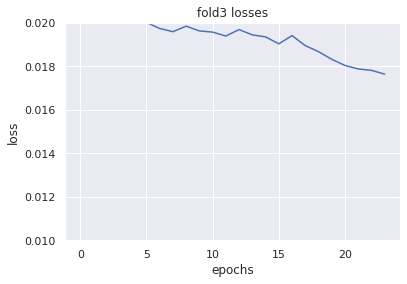

==========FOLD4==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.51061, train_metric: 0.51019
valid_loss: 0.02710, valid_metric: 0.02503
-----EPOCH2-----
train_loss: 0.01614, train_metric: 0.01329
valid_loss: 0.01359, valid_metric: 0.01049
-----EPOCH3-----
train_loss: 0.01343, train_metric: 0.01020
valid_loss: 0.01318, valid_metric: 0.00994
-----EPOCH4-----
train_loss: 0.01311, train_metric: 0.00981
valid_loss: 0.01435, valid_metric: 0.01090
-----EPOCH5-----
train_loss: 0.01305, train_metric: 0.00970
valid_loss: 0.01286, valid_metric: 0.00959
-----EPOCH6-----
train_loss: 0.01293, train_metric: 0.00961
valid_loss: 0.01288, valid_metric: 0.00954
-----EPOCH7-----
train_loss: 0.01281, train_metric: 0.00953
valid_loss: 0.01283, valid_metric: 0.00957
-----EPOCH8-----
train_loss: 0.01282, train_metric: 0.00956
valid_loss: 0.01282, valid_metric: 0.00962
-----EPOCH9-----
train_loss: 0.01285, train_metric: 0.00960
valid_loss: 0.01283, valid_metric: 0.00962
-----EPOCH10-----
train_loss: 0

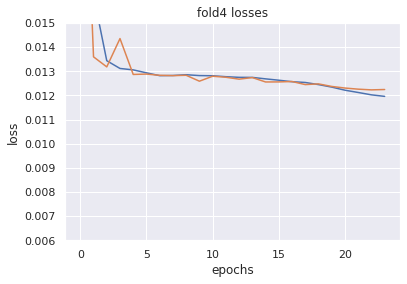

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65415, train_metric: 0.65408
valid_loss: 0.31123, valid_metric: 0.31071
-----EPOCH2-----
train_loss: 0.06729, train_metric: 0.06551
valid_loss: 0.02276, valid_metric: 0.02030
-----EPOCH3-----
train_loss: 0.02106, train_metric: 0.01834
valid_loss: 0.02060, valid_metric: 0.01771
-----EPOCH4-----
train_loss: 0.01995, train_metric: 0.01696
valid_loss: 0.02024, valid_metric: 0.01720
-----EPOCH5-----
train_loss: 0.02251, train_metric: 0.01935
valid_loss: 0.02045, valid_metric: 0.01706
-----EPOCH6-----
train_loss: 0.01976, train_metric: 0.01654
valid_loss: 0.02025, valid_metric: 0.01693
-----EPOCH7-----
train_loss: 0.01954, train_metric: 0.01631
valid_loss: 0.02027, valid_metric: 0.01698
-----EPOCH8-----
train_loss: 0.01944, train_metric: 0.01620
valid_loss: 0.02029, valid_metric: 0.01706
-----EPOCH9-----
train_loss: 0.01966, train_metric: 0.01641
valid_loss: 0.02035, valid_metric: 0.01705
-----EPOCH10-----
train_loss: 0.01937, train_metric: 0.01

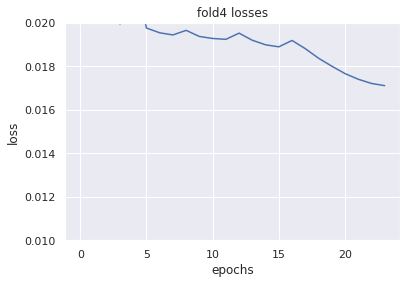

==========FOLD5==========
==ALL_TARGETS==
-----EPOCH1-----
train_loss: 0.50760, train_metric: 0.50717
valid_loss: 0.03013, valid_metric: 0.02807
-----EPOCH2-----
train_loss: 0.01610, train_metric: 0.01325
valid_loss: 0.01326, valid_metric: 0.01009
-----EPOCH3-----
train_loss: 0.01351, train_metric: 0.01023
valid_loss: 0.01362, valid_metric: 0.01037
-----EPOCH4-----
train_loss: 0.01327, train_metric: 0.00991
valid_loss: 0.01300, valid_metric: 0.00970
-----EPOCH5-----
train_loss: 0.01294, train_metric: 0.00962
valid_loss: 0.01369, valid_metric: 0.01033
-----EPOCH6-----
train_loss: 0.01287, train_metric: 0.00958
valid_loss: 0.01284, valid_metric: 0.00960
-----EPOCH7-----
train_loss: 0.01288, train_metric: 0.00961
valid_loss: 0.01278, valid_metric: 0.00951
-----EPOCH8-----
train_loss: 0.01292, train_metric: 0.00966
valid_loss: 0.01276, valid_metric: 0.00943
-----EPOCH9-----
train_loss: 0.01285, train_metric: 0.00959
valid_loss: 0.01265, valid_metric: 0.00939
-----EPOCH10-----
train_loss: 0

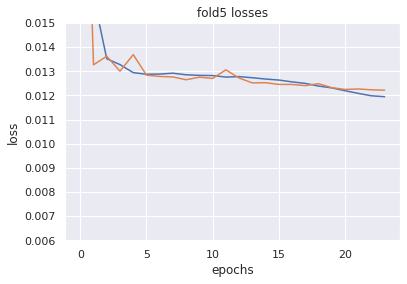

==SCORED_ONLY==
-----EPOCH1-----
train_loss: 0.65333, train_metric: 0.65325
valid_loss: 0.30322, valid_metric: 0.30269
-----EPOCH2-----
train_loss: 0.06660, train_metric: 0.06482
valid_loss: 0.02289, valid_metric: 0.02044
-----EPOCH3-----
train_loss: 0.02105, train_metric: 0.01834
valid_loss: 0.02074, valid_metric: 0.01785
-----EPOCH4-----
train_loss: 0.01982, train_metric: 0.01684
valid_loss: 0.02053, valid_metric: 0.01751
-----EPOCH5-----
train_loss: 0.02381, train_metric: 0.02063
valid_loss: 0.02062, valid_metric: 0.01729
-----EPOCH6-----
train_loss: 0.01957, train_metric: 0.01634
valid_loss: 0.02053, valid_metric: 0.01725
-----EPOCH7-----
train_loss: 0.01935, train_metric: 0.01611
valid_loss: 0.02054, valid_metric: 0.01724
-----EPOCH8-----
train_loss: 0.01929, train_metric: 0.01603
valid_loss: 0.02061, valid_metric: 0.01729
-----EPOCH9-----
train_loss: 0.01952, train_metric: 0.01626
valid_loss: 0.02063, valid_metric: 0.01734
-----EPOCH10-----
train_loss: 0.01929, train_metric: 0.01

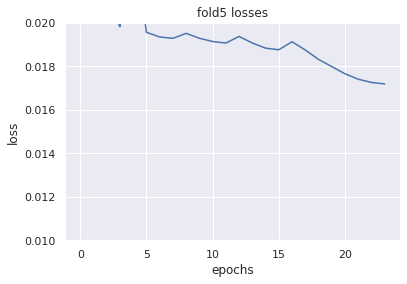

In [61]:
# Averaging on multiple SEEDS

SEED = [0, 1, 2]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))

print(f'device used: {DEVICE}')

for seed in SEED:
    
    print(f' ')
    print(f'SEED : {seed}')
    print(f'')
    
    oof_, predictions_ = run_k_fold(NFOLDS, seed, EPOCHS, LEARNING_RATE)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)
    
train[target_cols] = oof
test[target_cols] = predictions

In [62]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(
    train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)

y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

cv = 0
for i in range(len(target_cols)):
    cv_ = log_loss(y_true[:, i], y_pred[:, i])
    cv += cv_ / len(target_cols)
    
auc = 0
for i in range(len(target_cols)):
    auc_ = roc_auc_score(y_true[:, i], y_pred[:, i])
    auc += auc_ / len(target_cols)
    
print(f'CV log_loss: {cv:.6f}')
print(f'AUC: {auc:.6f}')

CV log_loss: 0.015651
AUC: 0.677910


In [63]:
file_path = 'oof_Simple_Deep.npy'
np.save(file_path, y_pred)

submission_Simple_Deep2 = sample_submission.drop(columns=target_cols).merge(
    test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0).iloc[:, 1:]
# sub.to_csv('submission.csv', index=False)

In [64]:
submission_Simple_Deep = submission_Simple_Deep1 * 0.7 + submission_Simple_Deep2 * 0.3

In [65]:
submission.iloc[:, 1:] = submission_Simple * 0.25 + submission_ResNet * 0.25 + submission_Simple_Deep * 0.25 + submission_TabNet * 0.25

submission.to_csv('submission.csv', index=False)